# Intro from SciKeras

Example to set up a TensorFlow neural network using SciKeras.

from: https://adriangb.com/scikeras/refs/heads/master/notebooks/Basic_Usage.html#3.-Training-a-regressor

# w/ ground_truth_smoothed + TDS_15000

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

num of cpus: 8


In [8]:
folder_path = '../data/ground_truth_smoothed/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df1 = pd.read_csv(file_path, header=None, names=['temperature', 'des_flux'], index_col=None)
            df1.squeeze("columns")
            data[filename] = df1
            
# Combine all the data into a single dataframe
df1 = pd.concat(data.values())

#display(df1)

data = pd.read_csv('../data/des_flux_15000.csv', index_col=0)
data = data.drop(['0'], axis=1)
data.columns = np.arange(303, 1203, 3)
targets = pd.read_csv('../data/def_param/def_param_v2.csv', index_col=0)
targets = targets[0:15000]
targets=np.log10(targets)
display(data)
#display(targets)
#targets.describe()

targets_dten = targets[['detrap_en1', 'detrap_en2', 'detrap_en3', 'detrap_en4']]
display(targets_dten)

targets_defc = targets[['def_conc1', 'def_conc2', 'def_conc3', 'def_conc4']]
display(targets_defc)

,303,306,309,312,315,318,321,324,327,330,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,5.431556e+14,8.071071e+14,1.184429e+15,1.713761e+15,2.445961e+15,3.429175e+15,4.721192e+15,6.375082e+15,8.442567e+15,1.097693e+16,...,5.140261e+08,9.834975e+09,6.844898e+09,-3.696907e+09,-1.254622e+10,-7.215040e+09,7.627497e+09,2.015646e+10,9.745521e+09,-8.880083e+09
1,2.596686e+12,4.076714e+12,6.351138e+12,9.803424e+12,1.500641e+13,2.279380e+13,3.434052e+13,5.130683e+13,7.590502e+13,1.081876e+14,...,1.002663e+10,-1.068198e+10,-6.840741e+09,-4.026817e+06,-8.034967e+08,-4.634127e+08,4.249926e+07,1.600916e+08,3.889720e+08,6.258744e+08
2,3.339683e+09,5.642021e+09,9.415832e+09,1.584884e+10,2.465948e+10,4.365091e+10,6.681661e+10,1.010321e+11,1.616761e+11,2.490812e+11,...,-1.188366e+12,-2.810876e+12,-2.920690e+12,-8.615067e+11,1.530847e+12,2.253783e+12,1.172452e+12,-1.771042e+11,-3.253680e+11,2.113905e+11
3,4.283466e+14,6.382062e+14,9.398283e+14,1.366072e+15,1.960707e+15,2.768870e+15,3.843024e+15,5.236549e+15,7.001591e+15,9.184977e+15,...,-1.875557e+11,1.031065e+12,1.008990e+12,3.197083e+11,-1.727457e+11,-1.657147e+11,5.615346e+10,2.094252e+11,1.182019e+11,-3.624939e+10
4,5.503130e+09,9.322873e+09,1.560241e+10,2.633345e+10,4.105667e+10,7.291645e+10,1.117411e+11,1.673243e+11,2.699026e+11,4.156991e+11,...,4.325521e+11,1.969668e+12,1.547482e+12,3.087470e+11,-3.824844e+11,-2.502393e+11,1.849993e+11,3.979655e+11,2.018650e+11,-6.875192e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3.716070e+08,6.477362e+08,1.116053e+09,1.937171e+09,2.998597e+09,5.132705e+09,8.034209e+09,1.292083e+10,2.935564e+10,5.327506e+10,...,1.115373e+12,-6.247980e+10,-1.570836e+11,-1.330799e+11,-1.303191e+11,-1.021088e+11,-7.449359e+10,-4.580231e+10,-6.773719e+09,-5.132272e+10
14996,1.648427e+11,2.678562e+11,4.291465e+11,6.896662e+11,1.096886e+12,1.640556e+12,2.468452e+12,3.832283e+12,6.040403e+12,9.362120e+12,...,6.053191e+12,1.156134e+12,-6.968984e+11,-1.321681e+12,-9.812151e+11,-7.408279e+11,-4.912488e+11,-3.512765e+11,-2.522848e+11,-5.532803e+10
14997,3.258232e+15,4.518116e+15,6.134973e+15,8.158378e+15,1.063716e+16,1.362517e+16,1.717411e+16,2.135776e+16,2.624071e+16,3.189453e+16,...,6.938606e+12,3.134205e+12,3.128328e+11,-1.104769e+12,-1.689070e+12,-1.041729e+12,-7.312501e+11,-4.404335e+11,-2.053144e+11,-1.195245e+11
14998,1.587418e+14,2.393419e+14,3.573717e+14,5.281862e+14,7.721274e+14,1.115258e+15,1.589609e+15,2.232418e+15,3.084444e+15,4.187508e+15,...,-2.273954e+10,1.148413e+11,1.236938e+11,6.334739e+10,1.194185e+10,-3.746565e+09,-6.765696e+09,-1.137732e+10,-8.330577e+09,1.285371e+08


,detrap_en1,detrap_en2,detrap_en3,detrap_en4
0,0.031443,0.037665,0.107516,0.134757
1,0.080354,0.159082,0.193694,0.264261
2,0.137289,0.181180,0.196881,0.202345
3,0.034420,0.092826,0.171222,0.269840
4,0.139829,0.197703,0.201590,0.248880
...,...,...,...,...
14995,0.162075,0.202134,0.202349,0.289266
14996,0.110007,0.136865,0.216518,0.292430
14997,0.005659,0.220189,0.292129,0.298811
14998,0.042493,0.138169,0.169589,0.172986


,def_conc1,def_conc2,def_conc3,def_conc4
0,-1.918837,-1.892938,-2.675767,-1.602267
1,-2.030555,-1.901392,-2.996865,-2.151971
2,-2.020689,-1.823427,-2.863789,-1.661659
3,-1.698449,-2.672288,-1.715194,-1.968193
4,-1.626996,-1.806224,-3.199062,-1.754677
...,...,...,...,...
14995,-1.627500,-2.284764,-2.750393,-1.738754
14996,-1.679145,-2.161642,-1.894236,-1.772730
14997,-1.960464,-1.616451,-1.856256,-2.727496
14998,-1.863082,-2.362898,-3.007523,-1.727098


In [11]:
gt_smooth=df1['des_flux']
gt_smooth=gt_smooth.tolist()
num_files=int(len(gt_smooth)/902)
gt_smooth=np.reshape(gt_smooth, [num_files, 902])
gt_smooth = pd.DataFrame(gt_smooth)
gt_smooth = gt_smooth.iloc[:,::3].drop([0], axis=1)
gt_smooth.columns = np.arange(303, 1203, 3)
display(gt_smooth)

,303,306,309,312,315,318,321,324,327,330,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,-1.189556e+13,-1.189556e+13,-1.601972e+13,-6.764586e+12,1.465824e+13,1.756642e+13,3.357349e+13,6.694878e+13,8.583175e+13,1.307798e+14,...,8.781599e+14,8.886085e+14,9.172637e+14,9.539456e+14,9.703699e+14,9.546444e+14,9.509347e+14,9.237300e+14,9.237300e+14,9.237300e+14
1,-1.242209e+13,-1.242209e+13,-1.160671e+13,-7.752681e+12,-1.709553e+12,-1.709553e+12,-3.193780e+12,-4.852353e+12,-1.084451e+13,-1.108761e+13,...,6.892849e+14,7.050914e+14,6.584873e+14,6.751751e+14,6.695220e+14,6.444787e+14,6.504005e+14,6.694371e+14,6.694371e+14,6.694371e+14
2,-3.056371e+12,-3.056371e+12,-3.056371e+12,-4.488124e+12,-4.488124e+12,-4.488124e+12,-4.790591e+12,-4.790591e+12,-4.790591e+12,-3.792556e+12,...,1.047999e+15,1.016736e+15,1.000431e+15,9.445331e+14,9.144904e+14,9.093861e+14,9.453542e+14,9.349422e+14,9.349422e+14,9.349422e+14
3,-5.630330e+12,-5.630330e+12,-5.630330e+12,-3.013159e+12,1.670978e+12,5.021667e+12,2.626789e+12,1.931717e+12,5.891271e+12,3.561159e+12,...,8.824831e+14,8.362190e+14,8.417632e+14,8.404725e+14,7.927108e+14,7.698884e+14,7.772837e+14,7.615103e+14,7.615103e+14,7.615103e+14
4,-3.441240e+12,-3.441240e+12,-5.115264e+12,-5.952275e+12,-5.966832e+12,-4.827420e+12,-5.466685e+12,-1.836251e+12,2.092247e+12,1.390735e+12,...,6.566746e+14,6.138524e+14,6.263330e+14,6.309943e+14,6.320706e+14,6.589949e+14,6.766455e+14,6.674962e+14,6.674962e+14,6.674962e+14
5,8.366467e+11,8.366467e+11,-8.373580e+11,-1.674361e+12,-4.185387e+12,-6.213632e+12,-4.065212e+12,-3.024283e+12,1.056062e+12,1.056062e+12,...,4.567005e+14,4.684412e+14,5.173519e+14,5.139929e+14,5.208772e+14,5.252722e+14,5.185077e+14,4.914499e+14,4.914499e+14,4.914499e+14
6,-1.350588e+14,-1.350588e+14,-1.324877e+14,-1.153871e+14,-1.096298e+14,-9.234390e+13,-7.636607e+13,-6.948777e+13,-6.785269e+13,-3.447872e+13,...,1.349333e+15,1.380000e+15,1.408667e+15,1.471333e+15,1.492667e+15,1.424667e+15,1.350000e+15,1.348667e+15,1.348667e+15,1.348667e+15
7,1.454906e+12,1.454906e+12,1.146146e+12,5.345952e+11,1.160219e+11,-2.705816e+12,-2.584151e+12,-2.837237e+12,-3.899729e+12,-5.992256e+12,...,8.274555e+14,8.431785e+14,8.719091e+14,8.678606e+14,8.927203e+14,8.792649e+14,8.387015e+14,8.032241e+14,8.032241e+14,8.032241e+14
8,4.497788e+12,4.497788e+12,4.497788e+12,1.854954e+12,3.504646e+12,-1.255354e+12,-4.888567e+12,-4.888567e+12,-5.263233e+12,-6.912926e+12,...,7.590507e+14,7.576300e+14,7.531184e+14,8.049415e+14,8.374485e+14,8.298971e+14,8.380026e+14,8.227731e+14,8.227731e+14,8.227731e+14
9,-1.191255e+12,-1.191255e+12,-1.711268e+12,-1.578087e+11,-3.818182e+12,-5.607553e+12,-5.712926e+12,-2.588758e+12,-6.791484e+12,-2.529036e+12,...,1.686667e+15,1.680000e+15,1.576667e+15,1.535333e+15,1.528000e+15,1.497333e+15,1.478667e+15,1.487333e+15,1.487333e+15,1.487333e+15


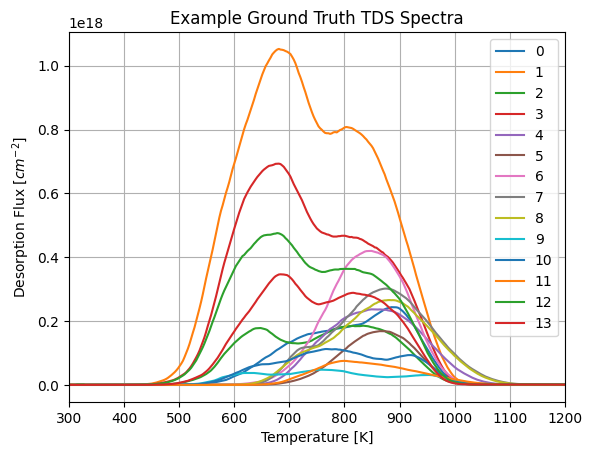

In [ ]:
import matplotlib.pyplot as plt
for i in np.arange(0,14):
    plt.plot(gt_smooth.iloc[i], label=str(i))
#plt.plot(ground_truth.iloc[10], label=str(10))
plt.title("Example Ground Truth TDS Spectra")
plt.xlabel("Temperature [K]")
plt.ylabel("Desorption Flux [$cm^{-2}$]")
plt.xticks(np.arange(0,1300,100))
plt.xlim([300,1200])
plt.grid()
plt.legend()
plt.show()

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

#add pipeline
#Split into train and test sets
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)
y_train, y_test = train_test_split(targets, test_size = 0.2, random_state = 42)
#y_train_defc, y_test_defc = train_test_split(targets_defc, test_size = 0.2, random_state = 42)
#y_train_dten, y_test_dten = train_test_split(targets_dten, test_size = 0.2, random_state = 42)

#Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#cv_scores = cross_val_score(pipeline, X_train, y_train_dten, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train)
#pipeline.fit(X_train, y_train_dten)
test_score = pipeline.score(X_test, y_test)
#test_score = pipeline.score(X_test, y_test_dten)
print(f"Test set score : {test_score}")

Cross-validation score: [-0.06308629 -5.69987483 -0.06168572 -0.0656779  -0.0628754 ]
Mean cross-validation score: -1.1906400288709569
Test set score : 0.4311038410645507


In [13]:
#Normalize the data

scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.fit_transform(X_test.values)
#gt_norm = scaler.fit_transform(ground_truth.values)

X_train_transform = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_transform = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
#gt_transform = pd.DataFrame(gt_norm, index=ground_truth.index, columns=ground_truth.columns)

#display(X_train_transform)
#display(X_test_transform)
X_train_transform.describe()
X_test_transform.describe()
#gt_transform.describe()

,303,306,309,312,315,318,321,324,327,330,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,...,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,-1.657933e-17,-7.223851e-17,3.079019e-17,5.921189e-17,5.684342e-17,-1.480297e-17,-4.618528e-17,5.921189e-17,1.184238e-17,5.802766e-17,...,-4.736952e-18,1.421085e-17,-7.105427e-18,-4.736952e-18,1.421085e-17,1.184238e-17,2.368476e-18,-9.473903e-18,-7.105427e-18,-4.736952e-18
std,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,...,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00
min,-4.190286e-01,-4.324523e-01,-4.464790e-01,-4.608412e-01,-4.753213e-01,-4.897180e-01,-5.038971e-01,-5.177429e-01,-5.313024e-01,-5.444639e-01,...,-9.910440e-02,-9.338746e-02,-8.768775e-02,-8.235440e-02,-7.787155e-02,-7.423208e-02,-6.968016e-02,-7.013604e-02,-6.498335e-02,-2.123192e-01
25%,-4.189894e-01,-4.324040e-01,-4.464200e-01,-4.607691e-01,-4.752329e-01,-4.896090e-01,-5.037597e-01,-5.175711e-01,-5.310911e-01,-5.442008e-01,...,-9.822869e-02,-9.208197e-02,-8.627410e-02,-8.079323e-02,-7.563533e-02,-7.079920e-02,-6.625484e-02,-6.199890e-02,-5.800650e-02,-5.430663e-02
50%,-4.122992e-01,-4.246215e-01,-4.373262e-01,-4.501023e-01,-4.625909e-01,-4.746528e-01,-4.863093e-01,-4.970061e-01,-5.063553e-01,-5.146327e-01,...,-9.822500e-02,-9.207740e-02,-8.626752e-02,-8.078505e-02,-7.562488e-02,-7.078471e-02,-6.623742e-02,-6.196854e-02,-5.796441e-02,-5.425939e-02
75%,-1.783032e-01,-1.645721e-01,-1.468558e-01,-1.238437e-01,-9.556518e-02,-6.605619e-02,-3.380321e-02,4.544364e-03,4.054311e-02,7.522206e-02,...,-9.819057e-02,-9.203983e-02,-8.622957e-02,-8.074109e-02,-7.557817e-02,-7.072288e-02,-6.616144e-02,-6.188043e-02,-5.786160e-02,-5.414272e-02
max,6.720082e+00,6.303987e+00,5.954355e+00,5.670963e+00,5.498405e+00,5.349773e+00,5.222346e+00,5.112146e+00,5.016885e+00,4.932767e+00,...,3.457779e+01,3.602366e+01,3.746155e+01,3.888102e+01,4.027138e+01,4.162268e+01,4.292451e+01,4.416810e+01,4.534697e+01,4.645330e+01


In [17]:
from sklearn.linear_model import RidgeCV

# Create the LassoCV model with a range of alpha values
alphas = np.logspace(-4, 2, 100)  # range of alpha values
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the LassoCV model on the training data
ridge_cv.fit(X_train_transform, y_train)

# Get the optimal alpha value
optimal_alpha = ridge_cv.alpha_

# Print the optimal alpha value
print("Optimal alpha:", optimal_alpha)

# Get the coefficients and corresponding feature names for the optimal alpha
ridge_coefs = ridge_cv.coef_
feature_names = X_train.columns

# Select the features with non-zero coefficients for the optimal alpha
#selected_features = [feature for feature, coef in zip(feature_names, ridge_coefs) if coef != 0]

# Print the selected features
# print("Selected Features:")
# print(selected_features)

Optimal alpha: 0.05336699231206313


In [ ]:
# #Measures alpha, to be used as activity_regularizer=l2(alpha)

# from sklearn import linear_model
# from sklearn.model_selection import cross_validate, KFold
# import matplotlib.pyplot as plt

# features = [c for c in X_train_transform.columns]
# cv_results = []
# coeffs = []
# alphas = np.logspace(-4, 0, 100)
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# for alpha in alphas: #set up an array for alpha
#     lasso = linear_model.Lasso(alpha=alpha, max_iter=10000) #iterate through alpha values
# #    lasso.fit(X_train_transform, y_train)#fit the norm_train_X and our target data column (form_y)
#     lasso.fit(X_train_transform, y_train_defc)#fit the norm_train_X and our target data column (form_y)    
# #    lasso.fit(X_train_transform, y_train_dten)#fit the norm_train_X and our target data column (form_y)
# #    scores = cross_validate(lasso, X_train_transform, y_train, cv=kfold, scoring="neg_mean_squared_error")
#     scores = cross_validate(lasso, X_train_transform, y_train_defc, cv=kfold, scoring="neg_mean_squared_error")
# #    scores = cross_validate(lasso, X_train_transform, y_train_dten, cv=kfold, scoring="neg_mean_squared_error")
#     cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))

# cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features[0:4])
# f, ax = plt.subplots(figsize=(6, 6))
# plt.plot(cv_results["alpha"], cv_results["score"], "-x")
# #plt.xlim(0,10000)
# plt.xscale(r"log")
# #plt.xlim([0.1, 10])
# #plt.xlim([0.01])
# plt.xlabel(r"$\alpha$")
# plt.ylabel(r"MSE")
# plt.title(r"Lasso regression")
# lasso_bestalpha = cv_results["alpha"][cv_results["score"].idxmin()]
# plt.annotate(
#     r"Best $\alpha$ = %.7f" % lasso_bestalpha,
#     (lasso_bestalpha, cv_results["score"].min()),
#     fontsize=16,
# );

In [ ]:
# #Measures alpha, to be used ass activity_regularizer=l2(alpha)

# from sklearn import linear_model
# from sklearn.model_selection import cross_validate, KFold
# import matplotlib.pyplot as plt

# features = [c for c in X_train_transform.columns]
# cv_results = []
# coeffs = []
# alphas = np.logspace(-2, 0, 100)
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# for alpha in alphas: #set up an array for alpha
#     ridge = linear_model.Ridge(alpha=alpha, max_iter=10000) #iterate through alpha values
#     ridge.fit(X_train_transform, y_train)#fit the norm_train_X and our target data column (form_y)
#     #ridge.fit(X_train_transform, y_train_defc)#fit the norm_train_X and our target data column (form_y)
#     #ridge.fit(X_train_transform, y_train_dten)#fit the norm_train_X and our target data column (form_y)
#     scores = cross_validate(ridge, X_train_transform, y_train, cv=kfold, scoring="neg_mean_squared_error")
#     #scores = cross_validate(ridge, X_train_transform, y_train_defc, cv=kfold, scoring="neg_mean_squared_error")
#     #scores = cross_validate(ridge, X_train_transform, y_train_dten, cv=kfold, scoring="neg_mean_squared_error")
#     cv_results.append([alpha, -np.mean(scores["test_score"])] + list(ridge.coef_))

# cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features[0:8])
# f, ax = plt.subplots(figsize=(6, 6))
# plt.plot(cv_results["alpha"], cv_results["score"], "-x")
# #plt.xlim(0,10000)
# plt.xscale(r"log")
# #plt.xlim([0.1, 10])
# #plt.xlim([0.01])
# plt.xlabel(r"$\alpha$")
# plt.ylabel(r"MSE")
# plt.title(r"Ridge regression")
# ridge_bestalpha = cv_results["alpha"][cv_results["score"].idxmin()]
# plt.annotate(
#     r"Best $\alpha$ = %.6f" % ridge_bestalpha,
#     (ridge_bestalpha, cv_results["score"].min()),
#     fontsize=16,
# );

In [61]:
from keras.regularizers import l2

#Functionalizes neural network
#Will iterate through up to 3 layers
#Output layer must be 8 neurons
#to fit the size of defect_param

def get_reg(meta, hidden_layer_sizes, dropout, layer_activation):
    n_features_in_ = meta["n_features_in_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=layer_activation, activity_regularizer=l2(optimal_alpha)))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(8, activation='linear'))
    model.summary()
    return model

In [27]:
#Pull params from GridSearch and plug into variables
#below to create model

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.001,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.05,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [31]:
#For loops to generate list of tuples for neuron list
#Imperfect, gives repeats but not rearranged repeats
#eg will give (32, 64, 512) but not (64, 32, 512) 

from itertools import combinations_with_replacement

neurons_list=[]
neurons=list(range(32,1092,64))
for layers in range(1, 4):
    neurons_per_layer=combinations_with_replacement(neurons,layers)
    temp=[i for i in neurons_per_layer]
    neurons_list.append(temp)
neurons_list=list(neurons_list)
print(neurons_list)

#stay below 1.0
learning_rate_list = []
for exponent in range(-7, -2):
    learning_rate_list.append(10**exponent)
print(learning_rate_list)

#entries must be below 1
dropout_list = list(np.linspace(0,0.5,5, endpoint=False))
print(dropout_list)

#define layer_activation params:
#layer_activation = 

#define output layer activation:


[[(32,), (96,), (160,), (224,), (288,), (352,), (416,), (480,), (544,), (608,), (672,), (736,), (800,), (864,), (928,), (992,), (1056,)], [(32, 32), (32, 96), (32, 160), (32, 224), (32, 288), (32, 352), (32, 416), (32, 480), (32, 544), (32, 608), (32, 672), (32, 736), (32, 800), (32, 864), (32, 928), (32, 992), (32, 1056), (96, 96), (96, 160), (96, 224), (96, 288), (96, 352), (96, 416), (96, 480), (96, 544), (96, 608), (96, 672), (96, 736), (96, 800), (96, 864), (96, 928), (96, 992), (96, 1056), (160, 160), (160, 224), (160, 288), (160, 352), (160, 416), (160, 480), (160, 544), (160, 608), (160, 672), (160, 736), (160, 800), (160, 864), (160, 928), (160, 992), (160, 1056), (224, 224), (224, 288), (224, 352), (224, 416), (224, 480), (224, 544), (224, 608), (224, 672), (224, 736), (224, 800), (224, 864), (224, 928), (224, 992), (224, 1056), (288, 288), (288, 352), (288, 416), (288, 480), (288, 544), (288, 608), (288, 672), (288, 736), (288, 800), (288, 864), (288, 928), (288, 992), (288,

In [27]:
#1 layer GridSearch gave (512,)
#For loop to make list of tuples
#(512, i)

# _2dim_layers=[]
# first_layer = 512
# for i in neurons:
#     temp_arch = (first_layer, i)
#     _2dim_layers.append(temp_arch)
# print(_2dim_layers)

[(512, 1), (512, 2), (512, 3), (512, 4), (512, 5), (512, 6), (512, 7), (512, 8), (512, 9), (512, 10), (512, 11), (512, 12), (512, 13), (512, 14), (512, 15), (512, 16), (512, 17), (512, 18), (512, 19)]


In [32]:
%%time
from sklearn.model_selection import GridSearchCV
best_params_log=[]
params = {
    'optimizer__learning_rate':lr_list,
    'model__hidden_layer_sizes':neurons_list[0],
                                # (100,100), (200,200), (300,300), (400,400),\
                                # (500,500), (600,600), (700,700), (800,800),
                                # (900,900), (1000,1000)],
    'model__dropout':dropout_list,
    'model__layer_activation': ['relu']
}
gs = GridSearchCV(reg, params, refit=False, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

gs.fit(X_train_transform, y_train)
print(gs.best_score_, gs.best_params_)

best_params_log.append([gs.best_score_, gs.best_params_])

Fitting 3 folds for each of 425 candidates, totalling 1275 fits
-0.08632667851475324 {'model__dropout': 0.30000000000000004, 'model__hidden_layer_sizes': (32,), 'model__layer_activation': 'relu', 'optimizer__learning_rate': 0.1}
CPU times: total: 15.6 s
Wall time: 28min 41s


In [ ]:
# Fitting 3 folds for each of 425 candidates, totalling 1275 fits
# -0.08632667851475324 {'model__dropout': 0.30000000000000004, 'model__hidden_layer_sizes': (32,), 'model__layer_activation': 'relu', 'optimizer__learning_rate': 0.1}
# CPU times: total: 15.6 s
# Wall time: 28min 41s

#From Expanse:

# -0.19474109420164176 {'optimizer__learning_rate': 0.001, 'model__layer_activation': 'relu', 'model__hidden_layer_sizes': (224,), 'model__dropout': 0.1}

# -0.1649389068206422 {'optimizer__learning_rate': 0.001, 'model__layer_activation': 'relu', 'model__hidden_layer_sizes': (160, 224, 224), 'model__dropout': 0.1}
# CPU times: user 5.14 s, sys: 579 ms, total: 5.72 s
# Wall time: 3min 25s

# -0.1577627218477348 {'optimizer__learning_rate': 0.001, 'model__layer_activation': 'relu', 'model__hidden_layer_sizes': (32, 160, 224), 'model__dropout': 0.0}
# CPU times: user 10.6 s, sys: 1.76 s, total: 12.4 s
# Wall time: 16min 24s

# -0.07396232051807781 {'model__dropout': 0.0, 'model__hidden_layer_sizes': (160, 480), 'model__layer_activation': 'relu', 'optimizer__learning_rate': 0.001}
# CPU times: user 15.1 s, sys: 2.78 s, total: 17.9 s
# Wall time: 34min 8s

# -0.07522649418761934 {'model__dropout': 0.1, 'model__hidden_layer_sizes': (544, 864), 'model__layer_activation': 'relu', 'optimizer__learning_rate': 0.001}
# CPU times: user 11.6 s, sys: 3.91 s, total: 15.5 s
# Wall time: 1h 2min 26s

In [87]:
#Once the param_grid is created, can call function again
#or 
from scikeras.wrappers import KerasRegressor

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.1,
    model__hidden_layer_sizes=(32,),
    model__dropout=0.3,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [88]:
import tensorflow as tf
from tensorflow import keras

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = reg.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback]);
#history = model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                352       
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 8)                 264       
                                                                 
Total params: 616
Trainable params: 616
Non-trainable params: 0
_________________________________________________________________


In [114]:
test_pred = reg.predict(X_test_transform)
test_pred = pd.DataFrame(10 ** test_pred, columns = targets.columns)
#y_pred = pd.DataFrame(y_pred, columns = targets.columns)
display(test_pred)
test_pred.describe()

,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
1,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
2,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
3,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
4,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
...,...,...,...,...,...,...,...,...
5995,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
5996,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
5997,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
5998,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695


,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
25%,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
50%,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
75%,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
max,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695


In [90]:
y_pred = reg.predict(gt_smooth)
y_pred = pd.DataFrame(y_pred, columns = targets.columns)
#y_pred = pd.DataFrame(y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,3.479511e-05,4.923104e-04,5.054684e-04,2.053308e-03,1.979215e-09,4.956405e-09,2.920586e-09,1.326923e-09
1,6.485307e-19,4.798695e-15,1.131334e-15,6.316116e-13,1.839231e-24,3.696039e-24,1.334156e-24,4.459888e-25
2,5.204367e-03,2.003310e-02,2.891804e-02,4.934216e-02,5.250529e-07,6.692958e-07,5.608144e-07,3.958918e-07
3,1.385334e-07,5.682089e-06,4.113753e-06,3.160564e-05,5.140976e-12,4.640163e-12,4.811075e-12,3.531990e-12
4,1.350096e-05,2.684795e-04,2.337020e-04,1.256209e-03,7.546922e-10,2.812152e-09,1.101622e-09,4.723023e-10
5,1.002967e-02,3.260459e-02,4.924487e-02,7.443190e-02,9.220904e-07,1.469179e-06,1.195276e-06,6.266835e-07
6,1.113175e-11,3.017407e-09,1.889326e-09,9.305464e-08,1.217509e-16,1.054813e-15,3.136692e-16,4.226518e-17
7,7.553771e-06,1.687992e-04,1.391483e-04,7.243769e-04,3.341321e-10,1.473063e-09,5.500382e-10,1.881094e-10
8,5.530414e-05,7.938997e-04,7.292448e-04,2.786715e-03,3.137452e-09,1.176033e-08,4.491047e-09,1.861696e-09
9,7.328719e-02,1.448907e-01,2.097988e-01,2.647762e-01,8.666827e-06,8.667190e-06,8.499522e-06,8.492205e-06


,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
count,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01
mean,1.574079e-02,3.318616e-02,4.851180e-02,6.341465e-02,1.855234e-06,1.917601e-06,1.841285e-06,1.745135e-06
std,2.872806e-02,5.699813e-02,8.330601e-02,1.047412e-01,3.441135e-06,3.450008e-06,3.363577e-06,3.301250e-06
min,6.485307e-19,4.798695e-15,1.131334e-15,6.316116e-13,1.839231e-24,3.696039e-24,1.334156e-24,4.459888e-25
25%,3.028744e-06,7.351571e-05,6.035762e-05,3.358528e-04,1.347385e-10,3.668479e-10,1.957442e-10,8.383370e-11
50%,2.603533e-05,3.803950e-04,3.713188e-04,1.654758e-03,1.453468e-09,3.884278e-09,2.011104e-09,9.965871e-10
75%,8.823341e-03,2.946171e-02,4.416317e-02,6.815947e-02,8.228310e-07,1.269209e-06,1.036660e-06,5.689856e-07
max,7.328719e-02,1.448907e-01,2.097988e-01,2.647762e-01,8.666827e-06,8.667190e-06,8.499522e-06,8.492205e-06


In [ ]:
targets.describe()

# w/ ground_truth_smoothed + TDS_15000 + pRamp05

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

num of cpus: 8


In [2]:
folder_path = '../data/ground_truth_smoothed'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df1 = pd.read_csv(file_path, header=None, names=['temperature', 'des_flux'], index_col=None)
            df1.squeeze("columns")
            data[filename] = df1
            
# Combine all the data into a single dataframe
df1 = pd.concat(data.values())

folder_path = '../data/TDS_15000/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df2 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None)
            df2.squeeze("columns")
            data[filename] = df2
            
# Combine all the data into a single dataframe
df2 = pd.concat(data.values())

#display(df2)

#Load and preprocess the data
folder_path = '../data/TDS_pRamp05_tmax_3000/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df3 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None)
            df3.squeeze("columns")
            data[filename] = df3
            
# Combine all the data into a single dataframe
df3 = pd.concat(data.values())

#display(df3)

# data = pd.read_csv('../data/des_flux_15000.csv', index_col=0)
# data = data.drop(['0'], axis=1)
# data.columns = np.arange(303, 1203, 3)
targets = pd.read_csv('../data/def_param/def_param_v2.csv', index_col=0)
# targets = targets[0:15000]
targets=np.log10(targets)
display(data)
display(targets)
#targets.describe()

targets_dten = targets[['detrap_en1', 'detrap_en2', 'detrap_en3', 'detrap_en4']]
targets_defc = targets[['def_conc1', 'def_conc2', 'def_conc3', 'def_conc4']]
# display(targets_dten)
# display(targets_defc)

{'training_data_1.csv':          des_flux  detrap_en  def_conc
 0    1.269745e-10   1.051587  0.011064
 1    8.527336e+14   1.185898  0.006066
 2    1.253326e+15   1.203310  0.020460
 3    1.820518e+15   1.242848  0.005844
 4    2.608805e+15        NaN       NaN
 ..            ...        ...       ...
 296 -2.389320e+11        NaN       NaN
 297  7.154362e+11        NaN       NaN
 298  8.113572e+11        NaN       NaN
 299  3.763505e+11        NaN       NaN
 300 -7.222705e+10        NaN       NaN
 
 [301 rows x 3 columns],
 'training_data_10.csv':          des_flux  detrap_en  def_conc
 0    0.000000e+00   1.255962  0.011071
 1    4.740753e+11   1.542662  0.002566
 2    7.577608e+11   1.639949  0.006255
 3    1.207382e+12   1.861172  0.002365
 4    1.910670e+12        NaN       NaN
 ..            ...        ...       ...
 296  7.734280e+11        NaN       NaN
 297 -1.123749e+12        NaN       NaN
 298 -2.996471e+12        NaN       NaN
 299 -1.264027e+12        NaN       NaN
 300  

,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,0.031443,0.037665,0.107516,0.134757,-1.918837,-1.892938,-2.675767,-1.602267
1,0.080354,0.159082,0.193694,0.264261,-2.030555,-1.901392,-2.996865,-2.151971
2,0.137289,0.181180,0.196881,0.202345,-2.020689,-1.823427,-2.863789,-1.661659
3,0.034420,0.092826,0.171222,0.269840,-1.698449,-2.672288,-1.715194,-1.968193
4,0.139829,0.197703,0.201590,0.248880,-1.626996,-1.806224,-3.199062,-1.754677
...,...,...,...,...,...,...,...,...
29995,0.016987,0.085322,0.243586,0.280761,-1.857671,-2.435538,-1.767692,-2.172605
29996,0.110936,0.135022,0.149539,0.263576,-1.981416,-1.800586,-2.088244,-1.693283
29997,0.060403,0.118300,0.136393,0.195624,-2.407172,-1.695261,-1.920141,-2.351595
29998,0.022790,0.054930,0.094976,0.100914,-1.761737,-1.642575,-1.837425,-1.662804


In [16]:
# display(ground_truth)
gt_smooth = df1['des_flux']
gt_smooth=gt_smooth.tolist()
num_files=int(len(gt_smooth)/901)
gt_smooth=np.reshape(gt_smooth, [num_files, 902])
gt_smooth = pd.DataFrame(gt_smooth)
gt_smooth = gt_smooth.iloc[:,::3]
gt_smooth.columns = np.arange(300, 1203, 3)
display(gt_smooth)

,300,303,306,309,312,315,318,321,324,327,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,1.0,-1.189556e+13,-1.189556e+13,-1.601972e+13,-6.764586e+12,1.465824e+13,1.756642e+13,3.357349e+13,6.694878e+13,8.583175e+13,...,8.781599e+14,8.886085e+14,9.172637e+14,9.539456e+14,9.703699e+14,9.546444e+14,9.509347e+14,9.237300e+14,9.237300e+14,9.237300e+14
1,1.0,-1.242209e+13,-1.242209e+13,-1.160671e+13,-7.752681e+12,-1.709553e+12,-1.709553e+12,-3.193780e+12,-4.852353e+12,-1.084451e+13,...,6.892849e+14,7.050914e+14,6.584873e+14,6.751751e+14,6.695220e+14,6.444787e+14,6.504005e+14,6.694371e+14,6.694371e+14,6.694371e+14
2,1.0,-3.056371e+12,-3.056371e+12,-3.056371e+12,-4.488124e+12,-4.488124e+12,-4.488124e+12,-4.790591e+12,-4.790591e+12,-4.790591e+12,...,1.047999e+15,1.016736e+15,1.000431e+15,9.445331e+14,9.144904e+14,9.093861e+14,9.453542e+14,9.349422e+14,9.349422e+14,9.349422e+14
3,1.0,-5.630330e+12,-5.630330e+12,-5.630330e+12,-3.013159e+12,1.670978e+12,5.021667e+12,2.626789e+12,1.931717e+12,5.891271e+12,...,8.824831e+14,8.362190e+14,8.417632e+14,8.404725e+14,7.927108e+14,7.698884e+14,7.772837e+14,7.615103e+14,7.615103e+14,7.615103e+14
4,1.0,-3.441240e+12,-3.441240e+12,-5.115264e+12,-5.952275e+12,-5.966832e+12,-4.827420e+12,-5.466685e+12,-1.836251e+12,2.092247e+12,...,6.566746e+14,6.138524e+14,6.263330e+14,6.309943e+14,6.320706e+14,6.589949e+14,6.766455e+14,6.674962e+14,6.674962e+14,6.674962e+14
5,1.0,8.366467e+11,8.366467e+11,-8.373580e+11,-1.674361e+12,-4.185387e+12,-6.213632e+12,-4.065212e+12,-3.024283e+12,1.056062e+12,...,4.567005e+14,4.684412e+14,5.173519e+14,5.139929e+14,5.208772e+14,5.252722e+14,5.185077e+14,4.914499e+14,4.914499e+14,4.914499e+14
6,1.0,-1.350588e+14,-1.350588e+14,-1.324877e+14,-1.153871e+14,-1.096298e+14,-9.234390e+13,-7.636607e+13,-6.948777e+13,-6.785269e+13,...,1.349333e+15,1.380000e+15,1.408667e+15,1.471333e+15,1.492667e+15,1.424667e+15,1.350000e+15,1.348667e+15,1.348667e+15,1.348667e+15
7,1.0,1.454906e+12,1.454906e+12,1.146146e+12,5.345952e+11,1.160219e+11,-2.705816e+12,-2.584151e+12,-2.837237e+12,-3.899729e+12,...,8.274555e+14,8.431785e+14,8.719091e+14,8.678606e+14,8.927203e+14,8.792649e+14,8.387015e+14,8.032241e+14,8.032241e+14,8.032241e+14
8,1.0,4.497788e+12,4.497788e+12,4.497788e+12,1.854954e+12,3.504646e+12,-1.255354e+12,-4.888567e+12,-4.888567e+12,-5.263233e+12,...,7.590507e+14,7.576300e+14,7.531184e+14,8.049415e+14,8.374485e+14,8.298971e+14,8.380026e+14,8.227731e+14,8.227731e+14,8.227731e+14
9,1.0,-1.191255e+12,-1.191255e+12,-1.711268e+12,-1.578087e+11,-3.818182e+12,-5.607553e+12,-5.712926e+12,-2.588758e+12,-6.791484e+12,...,1.686667e+15,1.680000e+15,1.576667e+15,1.535333e+15,1.528000e+15,1.497333e+15,1.478667e+15,1.487333e+15,1.487333e+15,1.487333e+15


In [7]:
des_flux = pd.concat([df2, df3])
des_flux=des_flux['des_flux']
des_flux=des_flux.tolist()
num_files=int(len(des_flux)/301)
des_flux=np.reshape(des_flux, [num_files, 301])
des_flux=pd.DataFrame(des_flux)
des_flux.columns =np.arange(300, 1203, 3)
display(des_flux)

,300,303,306,309,312,315,318,321,324,327,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,0.000000e+00,5.431556e+14,8.071071e+14,1.184429e+15,1.713761e+15,2.445961e+15,3.429175e+15,4.721192e+15,6.375082e+15,8.442567e+15,...,5.140261e+08,9.834975e+09,6.844898e+09,-3.696907e+09,-1.254622e+10,-7.215040e+09,7.627497e+09,2.015646e+10,9.745521e+09,-8.880083e+09
1,0.000000e+00,2.596686e+12,4.076714e+12,6.351138e+12,9.803424e+12,1.500641e+13,2.279380e+13,3.434052e+13,5.130683e+13,7.590502e+13,...,1.002663e+10,-1.068198e+10,-6.840741e+09,-4.026817e+06,-8.034967e+08,-4.634127e+08,4.249926e+07,1.600916e+08,3.889720e+08,6.258744e+08
2,0.000000e+00,3.339683e+09,5.642021e+09,9.415832e+09,1.584884e+10,2.465948e+10,4.365091e+10,6.681661e+10,1.010321e+11,1.616761e+11,...,-1.188366e+12,-2.810876e+12,-2.920690e+12,-8.615067e+11,1.530847e+12,2.253783e+12,1.172452e+12,-1.771042e+11,-3.253680e+11,2.113905e+11
3,-5.954772e-11,4.283466e+14,6.382062e+14,9.398283e+14,1.366072e+15,1.960707e+15,2.768870e+15,3.843024e+15,5.236549e+15,7.001591e+15,...,-1.875557e+11,1.031065e+12,1.008990e+12,3.197083e+11,-1.727457e+11,-1.657147e+11,5.615346e+10,2.094252e+11,1.182019e+11,-3.624939e+10
4,0.000000e+00,5.503130e+09,9.322873e+09,1.560241e+10,2.633345e+10,4.105667e+10,7.291645e+10,1.117411e+11,1.673243e+11,2.699026e+11,...,4.325521e+11,1.969668e+12,1.547482e+12,3.087470e+11,-3.824844e+11,-2.502393e+11,1.849993e+11,3.979655e+11,2.018650e+11,-6.875192e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000e+00,1.689039e+15,2.446563e+15,3.494097e+15,4.894547e+15,6.739293e+15,9.100266e+15,1.205319e+16,1.566680e+16,2.001387e+16,...,5.752700e+10,3.092911e+10,7.784658e+10,8.940344e+10,5.713156e+10,1.081009e+10,-2.489079e+10,-8.260778e+09,3.531860e+10,-6.279243e+10
29996,0.000000e+00,8.175037e+10,1.327560e+11,2.160134e+11,3.457857e+11,5.421220e+11,8.526925e+11,1.343330e+12,2.056551e+12,3.107966e+12,...,-1.959607e+10,-8.019001e+09,-4.445365e+09,3.673215e+09,-3.555064e+09,-1.534336e+10,-1.710536e+10,-4.169854e+09,1.270252e+10,-2.602646e+10
29997,1.283221e-12,7.488926e+12,1.154105e+13,1.763738e+13,2.669053e+13,4.012864e+13,5.983590e+13,8.855211e+13,1.300528e+14,1.895694e+14,...,5.110764e+11,-3.945068e+11,-7.873801e+11,-6.169365e+09,8.307220e+10,5.741707e+10,2.105079e+10,3.966011e+09,-9.201135e+08,-4.867187e+09
29998,0.000000e+00,9.693919e+14,1.429842e+15,2.085289e+15,3.002448e+15,4.262600e+15,5.957741e+15,8.185847e+15,1.104466e+16,1.462786e+16,...,2.655451e+11,-2.425931e+11,-9.060489e+11,-1.164792e+12,-5.652344e+11,2.895443e+11,6.977026e+11,4.488243e+11,1.282519e+10,2.356291e+11


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

#add pipeline
#Split into train and test sets
X_train, X_test = train_test_split(des_flux, test_size = 0.2, random_state = 42)
y_train, y_test = train_test_split(targets, test_size = 0.2, random_state = 42)
#y_train_dten, y_test_dten = train_test_split(targets_dten, test_size = 0.2, random_state = 42)

#Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#cv_scores = cross_val_score(pipeline, X_train, y_train_dten, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train)
#pipeline.fit(X_train, y_train_dten)
test_score = pipeline.score(X_test, y_test)
#test_score = pipeline.score(X_test, y_test_dten)
print(f"Test set score : {test_score}")

Cross-validation score: [-0.06955413 -0.06656002 -0.07473345 -0.06804077 -0.07079433]
Mean cross-validation score: -0.06993654165049722
Test set score : -0.9959952931365507


In [9]:
#Normalize the data

scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.fit_transform(X_test.values)
#gt_norm = scaler.fit_transform(ground_truth.values)

X_train_transform = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_transform = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
#gt_transform = pd.DataFrame(gt_norm, index=ground_truth.index, columns=ground_truth.columns)

#display(X_train_transform)
#display(X_test_transform)
X_train_transform.describe()
X_test_transform.describe()
#gt_transform.describe()

,300,303,306,309,312,315,318,321,324,327,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
count,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,...,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03
mean,7.697546e-18,-6.205407e-16,2.629008e-16,1.301477e-15,-1.800042e-16,1.063446e-15,-1.184238e-17,6.679102e-16,-1.711224e-15,-1.194896e-15,...,-7.815970e-17,-4.227729e-16,9.592327e-17,-3.422448e-16,2.877698e-16,7.105427e-18,9.473903e-17,3.173758e-16,-1.776357e-16,-3.007964e-16
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,...,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-2.523528e+01,-4.155176e-01,-4.280745e-01,-4.413441e-01,-4.551152e-01,-4.691930e-01,-4.833840e-01,-4.974564e-01,-5.113235e-01,-5.249128e-01,...,-1.237833e-01,-1.167253e-01,-1.101748e-01,-1.038536e-01,-9.787089e-02,-9.222001e-02,-8.700334e-02,-8.224434e-02,-7.780238e-02,-7.753250e-02
25%,1.025293e-02,-4.154680e-01,-4.280147e-01,-4.412715e-01,-4.550270e-01,-4.690868e-01,-4.832553e-01,-4.972968e-01,-5.111253e-01,-5.246665e-01,...,-1.236411e-01,-1.165723e-01,-1.098589e-01,-1.034996e-01,-9.749597e-02,-9.184320e-02,-8.653828e-02,-8.157320e-02,-7.694011e-02,-7.263525e-02
50%,1.025293e-02,-4.082131e-01,-4.197064e-01,-4.317308e-01,-4.439219e-01,-4.561256e-01,-4.679470e-01,-4.793264e-01,-4.900275e-01,-4.995889e-01,...,-1.236405e-01,-1.165717e-01,-1.098582e-01,-1.034988e-01,-9.749498e-02,-9.184208e-02,-8.653704e-02,-8.157161e-02,-7.693810e-02,-7.263310e-02
75%,1.025293e-02,-1.671699e-01,-1.550847e-01,-1.401937e-01,-1.214404e-01,-9.763786e-02,-7.155301e-02,-3.956929e-02,-5.570907e-03,2.999575e-02,...,-1.236231e-01,-1.165563e-01,-1.098441e-01,-1.034856e-01,-9.748276e-02,-9.182909e-02,-8.652358e-02,-8.155686e-02,-7.692490e-02,-7.261924e-02
max,2.249258e+01,8.646558e+00,8.326402e+00,8.008049e+00,7.779745e+00,7.587436e+00,7.415336e+00,7.255748e+00,7.118836e+00,7.000810e+00,...,2.641946e+01,2.748724e+01,2.857235e+01,2.967213e+01,3.078394e+01,3.190519e+01,3.303366e+01,3.416706e+01,3.530344e+01,3.644139e+01


In [ ]:
from sklearn.linear_model import RidgeCV

# Create the LassoCV model with a range of alpha values
alphas = np.logspace(1, 2, 100)  # range of alpha values
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the LassoCV model on the training data
ridge_cv.fit(X_train_transform, y_train)

# Get the optimal alpha value
optimal_alpha = ridge_cv.alpha_

# Print the optimal alpha value
print("Optimal alpha:", optimal_alpha)

# Get the coefficients and corresponding feature names for the optimal alpha
ridge_coefs = ridge_cv.coef_
feature_names = X_train.columns

# Select the features with non-zero coefficients for the optimal alpha
#selected_features = [feature for feature, coef in zip(feature_names, ridge_coefs) if coef != 0]

# Print the selected features
# print("Selected Features:")
# print(selected_features)

In [ ]:
from keras.regularizers import l2

#Functionalizes neural network
#Will iterate through up to 3 layers
#Output layer must be 8 neurons
#to fit the size of defect_param

def get_reg(meta, hidden_layer_sizes, dropout, layer_activation):
    n_features_in_ = meta["n_features_in_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=layer_activation, activity_regularizer=l2(optimal_alpha)))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(8, activation='linear'))
    model.summary()
    return model

In [ ]:
#Pull params from GridSearch and plug into variables
#below to create model

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.001,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.05,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
#For loops to generate list of tuples for neuron list
#Imperfect, gives repeats but not rearranged repeats
#eg will give (32, 64, 512) but not (64, 32, 512) 

from itertools import combinations_with_replacement

neurons_list=[]
neurons=list(range(32,1092,64))
for layers in range(1, 4):
    neurons_per_layer=combinations_with_replacement(neurons,layers)
    temp=[i for i in neurons_per_layer]
    neurons_list.append(temp)
neurons_list=list(neurons_list)
print(neurons_list)

#stay below 1.0
learning_rate_list = []
for exponent in range(-7, -2):
    learning_rate_list.append(10**exponent)
print(learning_rate_list)

#entries must be below 1
dropout_list = list(np.linspace(0,0.5,5, endpoint=False))
print(dropout_list)

#define layer_activation params:
#layer_activation = 

#define output layer activation:


In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rs_params_log = []
space = dict()
space['optimizer__learning_rate'] = learning_rate_list
space['model__hidden_layer_sizes'] = neurons_list[1]
space['model__dropout'] = dropout_list
space['model__layer_activation'] = ['relu']

search = RandomizedSearchCV(reg, space, n_iter=100, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, random_state=42)

search.fit(X_train_transform, y_train)
print(search.best_score_, search.best_params_)

rs_params_log.append([search.best_score_, search.best_params_])

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
best_params_log=[]
params = {
    'optimizer__learning_rate':lr_list,
    'model__hidden_layer_sizes':neurons_list[0],
                                # (100,100), (200,200), (300,300), (400,400),\
                                # (500,500), (600,600), (700,700), (800,800),
                                # (900,900), (1000,1000)],
    'model__dropout':dropout_list,
    'model__layer_activation': ['relu']
}
gs = GridSearchCV(reg, params, refit=False, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

gs.fit(X_train_transform, y_train)
print(gs.best_score_, gs.best_params_)

best_params_log.append([gs.best_score_, gs.best_params_])

In [ ]:
# Fitting 3 folds for each of 425 candidates, totalling 1275 fits
# -0.08544642183616713 {'model__dropout': 0.30000000000000004, 'model__hidden_layer_sizes': (96,), 'model__layer_activation': 'relu', 'optimizer__learning_rate': 0.001}
# CPU times: total: 14.2 s
# Wall time: 49min 45s

In [ ]:
#Once the param_grid is created, can call function again
#or 
from scikeras.wrappers import KerasRegressor

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.1,
    model__hidden_layer_sizes=(32,),
    model__dropout=0.3,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
import tensorflow as tf
from tensorflow import keras

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = reg.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback]);
#history = model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

In [ ]:
test_pred = reg.predict(X_test_transform)
test_pred = pd.DataFrame(10 ** test_pred, columns = targets.columns)
#y_pred = pd.DataFrame(y_pred, columns = targets.columns)
display(test_pred)
test_pred.describe()

In [ ]:
y_pred = reg.predict(gt_smooth)
y_pred = pd.DataFrame(y_pred, columns = targets.columns)
#y_pred = pd.DataFrame(y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

mse = test_pred(y_test_raw, y_pred)
print(mse)

# TDS_15000 + pRamp05 Noisy

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

num of cpus: 8


In [6]:
ground_truth = pd.read_csv('../data/ground_truth.csv', index_col=0)
display(ground_truth)

folder_path = '../data/TDS_15000/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df2 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None)
            df2.squeeze("columns")
            data[filename] = df2
            
# Combine all the data into a single dataframe
df2 = pd.concat(data.values())

#display(df2)

#Load and preprocess the data
folder_path = '../data/TDS_pRamp05_tmax_3000/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df3 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None)
            df3.squeeze("columns")
            data[filename] = df3
            
# Combine all the data into a single dataframe
df3 = pd.concat(data.values())

#display(df3)

# data = pd.read_csv('../data/des_flux_15000.csv', index_col=0)
# data = data.drop(['0'], axis=1)
# data.columns = np.arange(303, 1203, 3)
targets = pd.read_csv('../data/def_param/def_param_v2.csv', index_col=0)
# targets = targets[0:15000]
targets=np.log10(targets)
display(data)
display(targets)
#targets.describe()

targets_dten = targets[['detrap_en1', 'detrap_en2', 'detrap_en3', 'detrap_en4']]
targets_defc = targets[['def_conc1', 'def_conc2', 'def_conc3', 'def_conc4']]
# display(targets_dten)
# display(targets_defc)

,300,303,306,309,312,315,318,321,324,327,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,4.525300e+12,-1.784130e+13,-1.784130e+13,-1.784130e+13,-1.784130e+13,1.675600e+13,9.518780e+12,-2.094960e+12,-1.784130e+13,-1.784130e+13,...,7.250470e+14,6.333520e+14,7.963290e+14,7.479470e+14,4.006550e+14,8.860110e+14,6.563540e+14,6.573770e+14,7.004280e+14,5.697390e+14
1,1.654320e+13,3.988390e+12,-8.567110e+12,8.031060e+12,-8.567110e+12,1.191180e+13,3.022560e+12,-8.567110e+12,-8.567110e+12,1.344150e+12,...,9.874650e+14,8.634820e+14,9.674340e+14,8.702990e+14,8.421880e+14,6.888330e+14,1.060000e+15,8.536030e+14,6.443090e+14,7.066080e+14
2,-1.028620e+13,2.269160e+12,-1.028620e+13,3.142260e+13,-1.028620e+13,-1.028620e+13,-9.420340e+12,-3.750230e+12,-1.028620e+13,-1.028620e+13,...,6.676990e+14,6.425900e+14,9.855040e+14,8.213330e+14,9.948910e+14,8.665190e+14,8.164380e+14,7.933860e+14,7.723480e+14,7.304420e+14
3,-1.181680e+13,2.000000e+15,1.329410e+13,-1.181680e+13,-1.181680e+13,-1.181680e+13,8.628270e+12,-1.181680e+13,-1.181680e+13,1.471700e+13,...,5.812670e+14,5.771960e+14,5.599690e+14,4.564400e+14,6.698580e+14,4.476920e+14,4.949170e+14,6.765110e+14,6.102060e+14,5.289290e+14
4,1.558540e+13,-9.524670e+12,1.558560e+13,7.073520e+12,-4.450000e+12,-9.524670e+12,-9.524670e+12,-9.524670e+12,7.882990e+12,-9.524670e+12,...,4.854100e+14,6.239890e+14,3.941640e+14,5.123780e+14,6.198720e+14,4.961120e+14,7.138440e+14,4.542840e+14,3.974630e+14,4.569150e+14
5,1.517080e+13,-9.939560e+12,1.517060e+13,-9.939560e+12,-3.505840e+11,-9.939560e+12,-9.939560e+12,5.373360e+12,-9.939560e+12,-9.939560e+12,...,6.551080e+14,6.245890e+14,7.641670e+14,5.484360e+14,6.215100e+14,6.571730e+14,8.563360e+14,8.183120e+14,6.106460e+14,5.397580e+14
6,-8.720280e+12,-8.720280e+12,-8.720280e+12,-8.720280e+12,2.720290e+13,-8.720280e+12,1.211500e+13,7.026510e+12,-8.720280e+12,-8.720280e+12,...,8.968340e+14,8.911630e+14,7.251540e+14,7.105960e+14,1.020000e+15,7.372650e+14,5.452170e+14,7.039320e+14,6.759680e+14,7.128530e+14
7,-1.083020e+13,-1.083020e+13,-1.083020e+13,-1.083020e+13,-1.083020e+13,-3.983970e+12,-1.083020e+13,2.120000e+15,9.702310e+12,-1.083020e+13,...,1.040000e+15,8.259550e+14,9.512900e+14,9.266030e+14,1.060000e+15,8.312620e+14,9.462960e+14,7.806500e+14,1.020000e+15,8.814360e+14
8,-9.080780e+12,-7.424050e+12,-9.080780e+12,-9.080780e+12,-9.080780e+12,-9.080780e+12,-9.080780e+12,5.584860e+13,-9.080780e+12,-9.080780e+12,...,1.030000e+15,9.905700e+14,7.961720e+14,6.855400e+14,8.986160e+14,7.753090e+14,8.660200e+14,8.803970e+14,5.979890e+14,7.939370e+14
9,-6.867890e+12,-6.867890e+12,-6.867890e+12,-6.867890e+12,-6.867890e+12,-6.867890e+12,-6.867890e+12,-6.867890e+12,-6.867890e+12,-6.867890e+12,...,1.040000e+15,1.000000e+15,1.010000e+15,8.417030e+14,9.048890e+14,8.490400e+14,8.983060e+14,1.060000e+15,1.070000e+15,7.191550e+14


{'training_data_1.csv':          des_flux  detrap_en  def_conc
 0    1.269745e-10   1.051587  0.011064
 1    8.527336e+14   1.185898  0.006066
 2    1.253326e+15   1.203310  0.020460
 3    1.820518e+15   1.242848  0.005844
 4    2.608805e+15        NaN       NaN
 ..            ...        ...       ...
 296 -2.389320e+11        NaN       NaN
 297  7.154362e+11        NaN       NaN
 298  8.113572e+11        NaN       NaN
 299  3.763505e+11        NaN       NaN
 300 -7.222705e+10        NaN       NaN
 
 [301 rows x 3 columns],
 'training_data_10.csv':          des_flux  detrap_en  def_conc
 0    0.000000e+00   1.255962  0.011071
 1    4.740753e+11   1.542662  0.002566
 2    7.577608e+11   1.639949  0.006255
 3    1.207382e+12   1.861172  0.002365
 4    1.910670e+12        NaN       NaN
 ..            ...        ...       ...
 296  7.734280e+11        NaN       NaN
 297 -1.123749e+12        NaN       NaN
 298 -2.996471e+12        NaN       NaN
 299 -1.264027e+12        NaN       NaN
 300  

,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,0.031443,0.037665,0.107516,0.134757,-1.918837,-1.892938,-2.675767,-1.602267
1,0.080354,0.159082,0.193694,0.264261,-2.030555,-1.901392,-2.996865,-2.151971
2,0.137289,0.181180,0.196881,0.202345,-2.020689,-1.823427,-2.863789,-1.661659
3,0.034420,0.092826,0.171222,0.269840,-1.698449,-2.672288,-1.715194,-1.968193
4,0.139829,0.197703,0.201590,0.248880,-1.626996,-1.806224,-3.199062,-1.754677
...,...,...,...,...,...,...,...,...
29995,0.016987,0.085322,0.243586,0.280761,-1.857671,-2.435538,-1.767692,-2.172605
29996,0.110936,0.135022,0.149539,0.263576,-1.981416,-1.800586,-2.088244,-1.693283
29997,0.060403,0.118300,0.136393,0.195624,-2.407172,-1.695261,-1.920141,-2.351595
29998,0.022790,0.054930,0.094976,0.100914,-1.761737,-1.642575,-1.837425,-1.662804


In [ ]:
# display(ground_truth)
# ground_truth=ground_truth.tolist()
# num_files=int(len(ground_truth)/901)
# ground_truth=np.reshape(ground_truth, [num_files, 901])
# ground_truth = pd.DataFrame(ground_truth)
# ground_truth = ground_truth.iloc[:,::3].drop([0], axis=1)
# ground_truth.columns = np.arange(303, 1203, 3)
# display(ground_truth)

In [7]:
des_flux = pd.concat([df2, df3])
des_flux=des_flux['des_flux']
des_flux=des_flux.tolist()
num_files=int(len(des_flux)/301)
des_flux=np.reshape(des_flux, [num_files, 301])
des_flux=pd.DataFrame(des_flux)
des_flux.columns =np.arange(300, 1206, 3)
display(des_flux)

MemoryError: 

In [ ]:
# ground_truth=df1['des_flux']
# ground_truth=ground_truth.tolist()
# num_files=int(len(ground_truth)/902)
# ground_truth=np.reshape(ground_truth, [num_files, 902])
# ground_truth = pd.DataFrame(ground_truth)
# ground_truth = ground_truth.iloc[:,::3].drop([0], axis=1)
# ground_truth.columns = np.arange(303, 1203, 3)
# display(ground_truth)

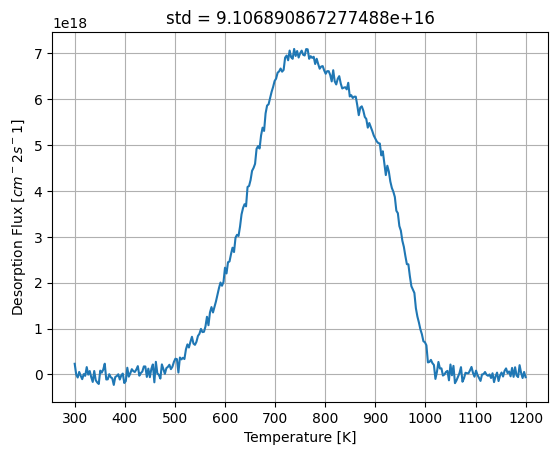

In [162]:
spect_wnoise=[]
noise_array=[]
sigma_list=[]
for n in np.arange(0, des_flux.shape[0]):
    sigma_rand = np.random.uniform(1E14, 1E17)
    for i, k in enumerate(des_flux.iloc[n]):
        spect_wnoise.append(np.random.normal(k, sigma_rand))
    sigma_list.append(str(sigma_rand))
    noise_array.append(spect_wnoise)
    spect_wnoise=[]
x = np.arange(300,1203,step=3)
plt.plot(x, noise_array[4])
plt.xticks(np.arange(300,1300,100))
plt.title(f"std = {sigma_list[4]}")
plt.xlabel("Temperature [K]")
plt.ylabel(f"Desorption Flux [$cm^{-2}s^{-1}$]")
plt.grid()
plt.show()

In [167]:
noise_array = pd.DataFrame(noise_array)
noise_array.columns=np.arange(300, 1206, 3)
display(noise_array)

,300,303,306,309,312,315,318,321,324,327,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,-1.530954e+16,9.534636e+16,1.912801e+16,-1.201496e+17,3.009607e+15,2.257292e+16,7.076620e+16,7.997026e+16,1.870863e+17,-1.071674e+17,...,-6.004864e+16,1.166734e+17,6.393150e+15,-3.417893e+16,3.348994e+16,-6.893602e+16,-7.692224e+16,-3.331273e+16,-1.578965e+17,8.552828e+16
1,3.210080e+16,-1.824849e+16,-1.161091e+17,-9.539081e+16,-4.644506e+15,1.266153e+17,9.203698e+16,3.319273e+16,3.458036e+14,-5.835140e+16,...,4.985452e+16,7.721324e+16,-1.359730e+16,4.524278e+16,3.599241e+16,5.781599e+16,-2.411467e+15,-5.907773e+16,7.924595e+16,-6.134097e+15
2,3.506915e+16,-5.339067e+16,1.402106e+17,-1.038729e+17,4.741901e+16,-1.403955e+17,-4.594060e+16,-8.520451e+16,1.309278e+16,1.671088e+17,...,3.049317e+16,1.175402e+15,-3.662559e+16,6.591270e+16,-2.837761e+16,1.255097e+17,-2.893171e+16,-1.509703e+17,-2.059896e+17,-8.432505e+16
3,9.298625e+16,5.064474e+16,-4.805220e+14,-5.264073e+16,1.291110e+16,-4.600139e+16,2.094875e+15,-5.701931e+16,-3.615470e+16,-2.266862e+16,...,-9.101890e+16,6.957732e+16,7.272591e+16,-2.478826e+16,-4.652662e+16,3.010101e+16,-8.529559e+14,1.259347e+17,-1.700836e+15,2.537513e+16
4,2.328807e+17,-1.324038e+14,-6.682377e+16,5.499565e+16,-2.933949e+16,-1.026246e+17,7.136158e+15,-2.947469e+16,1.611279e+17,-3.536724e+15,...,1.434912e+17,-5.210519e+16,1.563184e+17,-2.255674e+16,-5.733419e+16,2.025319e+17,3.558832e+16,-7.727443e+16,5.476366e+16,-5.954948e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-2.420001e+15,-1.777104e+14,3.672857e+16,-3.770252e+16,4.865753e+16,-3.798337e+16,1.287714e+16,-7.468265e+14,5.582781e+16,5.172020e+16,...,2.830782e+16,-5.363540e+16,4.065907e+16,-3.355647e+16,4.052176e+16,1.203993e+16,4.320943e+16,5.849095e+16,8.638638e+15,-5.362212e+16
29996,8.494519e+15,-1.780127e+16,-6.581344e+16,1.688935e+15,-4.901784e+16,-4.039968e+16,3.621507e+16,4.257222e+16,-1.677052e+15,-2.571094e+16,...,5.652818e+16,-3.167297e+16,7.661294e+16,-4.029160e+16,5.601547e+16,-3.339470e+15,5.389385e+16,-4.330391e+15,6.815899e+16,-5.772394e+16
29997,-1.409282e+17,-1.361353e+17,-3.963507e+16,1.383624e+17,-2.268545e+16,6.342393e+16,-4.845509e+16,-1.919335e+17,3.963671e+16,-8.329621e+16,...,-1.381057e+17,-2.430203e+16,-8.011521e+16,-7.732140e+16,-1.316202e+15,2.388637e+16,1.724522e+17,1.622853e+17,-5.528249e+16,-8.587343e+16
29998,2.742146e+16,1.530304e+17,9.581258e+15,-4.314070e+16,-1.178907e+17,-8.368060e+16,-6.395266e+16,3.927199e+15,-1.842421e+17,-1.240931e+17,...,-5.828978e+15,3.951295e+16,-9.070193e+16,-8.866723e+15,1.043753e+17,1.580503e+16,1.253034e+17,1.113849e+17,-1.467852e+17,-1.986773e+16


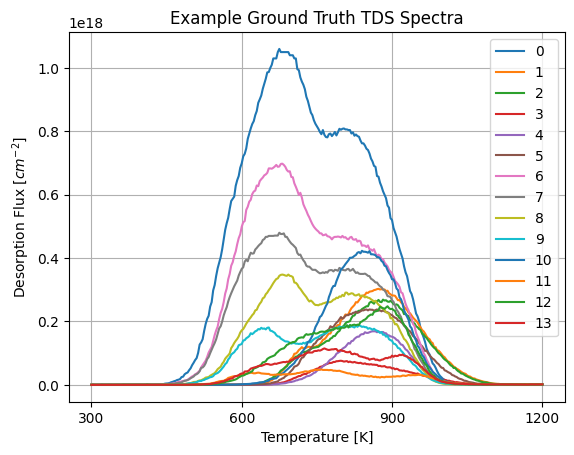

In [148]:
import matplotlib.pyplot as plt
for i in np.arange(0,14):
    plt.plot(ground_truth.iloc[i], label=str(i))
#plt.plot(ground_truth.iloc[10], label=str(10))
plt.title("Example Ground Truth TDS Spectra")
plt.xlabel("Temperature [K]")
plt.ylabel("Desorption Flux [$cm^{-2}$]")
plt.xticks(np.arange(0,301,100))
#plt.xlim([300,1200])
plt.grid()
plt.legend()
plt.show()

In [168]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

#add pipeline
#Split into train and test sets
X_train, X_test = train_test_split(noise_array, test_size = 0.2, random_state = 42)
y_train, y_test = train_test_split(targets, test_size = 0.2, random_state = 42)
#y_train_dten, y_test_dten = train_test_split(targets_dten, test_size = 0.2, random_state = 42)

#Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#cv_scores = cross_val_score(pipeline, X_train, y_train_dten, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train)
#pipeline.fit(X_train, y_train_dten)
test_score = pipeline.score(X_test, y_test)
#test_score = pipeline.score(X_test, y_test_dten)
print(f"Test set score : {test_score}")

Cross-validation score: [-0.07000955 -0.06920957 -0.07091032 -0.07031722 -0.07292581]
Mean cross-validation score: -0.07067449444107564
Test set score : 0.3452524916050198


In [169]:
#Normalize the data

scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.fit_transform(X_test.values)
#gt_norm = scaler.fit_transform(ground_truth.values)

X_train_transform = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_transform = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
#gt_transform = pd.DataFrame(gt_norm, index=ground_truth.index, columns=ground_truth.columns)

#display(X_train_transform)
#display(X_test_transform)
X_train_transform.describe()
X_test_transform.describe()
#gt_transform.describe()

,300,303,306,309,312,315,318,321,324,327,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
count,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6000.000000,6.000000e+03,6.000000e+03,6.000000e+03,...,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03
mean,-8.881784e-18,-5.921189e-18,-1.184238e-18,1.302662e-17,-1.894781e-17,-8.289665e-18,0.000000,-2.013204e-17,-4.144833e-18,5.921189e-18,...,-3.197442e-17,-2.250052e-17,1.184238e-18,-4.144833e-18,-1.065814e-17,-7.105427e-18,-4.736952e-18,1.006602e-17,-4.144833e-18,1.539509e-17
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083,1.000083e+00,1.000083e+00,1.000083e+00,...,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-5.885183e+00,-4.611392e+00,-4.955913e+00,-6.111164e+00,-4.371822e+00,-4.780323e+00,-6.060512,-4.863812e+00,-5.579671e+00,-5.496927e+00,...,-2.616224e+00,-2.740623e+00,-3.086206e+00,-3.972655e+00,-3.824164e+00,-3.961424e+00,-3.815764e+00,-4.171506e+00,-5.425615e+00,-5.295526e+00
25%,-4.645478e-01,-4.741382e-01,-4.484705e-01,-4.501990e-01,-4.687643e-01,-4.564124e-01,-0.461447,-4.530329e-01,-4.717116e-01,-4.620612e-01,...,-2.828297e-01,-2.972186e-01,-3.186052e-01,-3.468534e-01,-3.668407e-01,-3.835760e-01,-3.967843e-01,-4.013150e-01,-4.208532e-01,-4.355375e-01
50%,-1.093333e-02,-1.727026e-02,-1.300677e-02,-1.348516e-03,-1.752755e-02,-9.646707e-03,-0.012665,-9.727649e-03,-1.552077e-02,-2.683453e-02,...,-1.002569e-01,-8.159098e-02,-8.576949e-02,-7.766658e-02,-6.904645e-02,-4.793690e-02,-2.739600e-02,-4.037367e-02,-2.590255e-02,-1.517325e-02
75%,4.584039e-01,4.672425e-01,4.419634e-01,4.587407e-01,4.593460e-01,4.681299e-01,0.466318,4.549627e-01,4.766679e-01,4.830356e-01,...,1.347326e-01,1.743762e-01,2.071861e-01,2.475935e-01,2.796362e-01,3.160955e-01,3.400292e-01,3.831224e-01,4.037908e-01,4.319966e-01
max,5.586789e+00,4.797101e+00,5.055848e+00,5.707776e+00,5.228852e+00,5.448986e+00,5.070493,5.497296e+00,5.011763e+00,4.871830e+00,...,2.374768e+01,2.383658e+01,2.394630e+01,2.366630e+01,2.312675e+01,2.141371e+01,2.008739e+01,1.853458e+01,1.639261e+01,1.340726e+01


In [171]:
from sklearn.linear_model import RidgeCV

# Create the LassoCV model with a range of alpha values
alphas = np.logspace(1, 2, 100)  # range of alpha values
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the LassoCV model on the training data
ridge_cv.fit(X_train_transform, y_train)

# Get the optimal alpha value
optimal_alpha = ridge_cv.alpha_

# Print the optimal alpha value
print("Optimal alpha:", optimal_alpha)

# Get the coefficients and corresponding feature names for the optimal alpha
ridge_coefs = ridge_cv.coef_
feature_names = X_train.columns

# Select the features with non-zero coefficients for the optimal alpha
#selected_features = [feature for feature, coef in zip(feature_names, ridge_coefs) if coef != 0]

# Print the selected features
# print("Selected Features:")
# print(selected_features)

Optimal alpha: 22.570197196339205


In [172]:
from keras.regularizers import l2

#Functionalizes neural network
#Will iterate through up to 3 layers
#Output layer must be 8 neurons
#to fit the size of defect_param

def get_reg(meta, hidden_layer_sizes, dropout, layer_activation):
    n_features_in_ = meta["n_features_in_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=layer_activation, activity_regularizer=l2(optimal_alpha)))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(8, activation='linear'))
    model.summary()
    return model

In [173]:
#Pull params from GridSearch and plug into variables
#below to create model

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.001,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.05,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [177]:
#For loops to generate list of tuples for neuron list
#Imperfect, gives repeats but not rearranged repeats
#eg will give (32, 64, 512) but not (64, 32, 512) 

from itertools import combinations_with_replacement

neurons_list=[]
neurons=list(range(32,1092,32))
for layers in range(1, 4):
    neurons_per_layer=combinations_with_replacement(neurons,layers)
    temp=[i for i in neurons_per_layer]
    neurons_list.append(temp)
neurons_list=list(neurons_list)
print(neurons_list)

#stay below 1.0
learning_rate_list = []
for exponent in range(-7, -2):
    learning_rate_list.append(10**exponent)
print(learning_rate_list)

#entries must be below 1
dropout_list = list(np.linspace(0,0.5,5, endpoint=False))
print(dropout_list)

#define layer_activation params:
#layer_activation = 

#define output layer activation:


[[(32,), (64,), (96,), (128,), (160,), (192,), (224,), (256,), (288,), (320,), (352,), (384,), (416,), (448,), (480,), (512,), (544,), (576,), (608,), (640,), (672,), (704,), (736,), (768,), (800,), (832,), (864,), (896,), (928,), (960,), (992,), (1024,)], [(32, 32), (32, 64), (32, 96), (32, 128), (32, 160), (32, 192), (32, 224), (32, 256), (32, 288), (32, 320), (32, 352), (32, 384), (32, 416), (32, 448), (32, 480), (32, 512), (32, 544), (32, 576), (32, 608), (32, 640), (32, 672), (32, 704), (32, 736), (32, 768), (32, 800), (32, 832), (32, 864), (32, 896), (32, 928), (32, 960), (32, 992), (32, 1024), (64, 64), (64, 96), (64, 128), (64, 160), (64, 192), (64, 224), (64, 256), (64, 288), (64, 320), (64, 352), (64, 384), (64, 416), (64, 448), (64, 480), (64, 512), (64, 544), (64, 576), (64, 608), (64, 640), (64, 672), (64, 704), (64, 736), (64, 768), (64, 800), (64, 832), (64, 864), (64, 896), (64, 928), (64, 960), (64, 992), (64, 1024), (96, 96), (96, 128), (96, 160), (96, 192), (96, 224)

In [4]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rs_params_log = []
space = dict()
space['optimizer__learning_rate'] = learning_rate_list
space['model__hidden_layer_sizes'] = neurons_list[2]
space['model__dropout'] = dropout_list
space['model__layer_activation'] = ['relu']

search = RandomizedSearchCV(reg, space, n_iter=100, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, random_state=42)

search.fit(X_train_transform, y_train)
print(search.best_score_, search.best_params_)

rs_params_log.append([search.best_score_, search.best_params_])

NameError: name 'learning_rate_list' is not defined

In [ ]:
# -0.7932377829951941 {'optimizer__learning_rate': 0.001, 'model__layer_activation': 'relu', 'model__hidden_layer_sizes': (32, 448), 'model__dropout': 0.30000000000000004}
# CPU times: total: 11.4 s
# Wall time: 21min

In [175]:
%%time
from sklearn.model_selection import GridSearchCV
best_params_log=[]
params = {
    'optimizer__learning_rate':learning_rate_list,
    'model__hidden_layer_sizes':neurons_list[0],
                                # (100,100), (200,200), (300,300), (400,400),\
                                # (500,500), (600,600), (700,700), (800,800),
                                # (900,900), (1000,1000)],
    'model__dropout':dropout_list,
    'model__layer_activation': ['relu']
}
gs = GridSearchCV(reg, params, refit=False, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)

gs.fit(X_train_transform, y_train)
print(gs.best_score_, gs.best_params_)

best_params_log.append([gs.best_score_, gs.best_params_])

Fitting 3 folds for each of 425 candidates, totalling 1275 fits
-0.8335733435228256 {'model__dropout': 0.0, 'model__hidden_layer_sizes': (992,), 'model__layer_activation': 'relu', 'optimizer__learning_rate': 0.0001}
CPU times: total: 15.6 s
Wall time: 46min 16s


In [ ]:
# Fitting 3 folds for each of 425 candidates, totalling 1275 fits
# -0.8335733435228256 {'model__dropout': 0.0, 'model__hidden_layer_sizes': (992,), 'model__layer_activation': 'relu', 'optimizer__learning_rate': 0.0001}
# CPU times: total: 15.6 s
# Wall time: 46min 16s

In [ ]:
#Once the param_grid is created, can call function again
#or 
from scikeras.wrappers import KerasRegressor

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.001,
    model__hidden_layer_sizes=(96,),
    model__dropout=0.3,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
import tensorflow as tf
from tensorflow import keras

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = reg.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback]);
#history = model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 96)                1056      
                                                                 
 dropout_27 (Dropout)        (None, 96)                0         
                                                                 
 dense_39 (Dense)            (None, 8)                 776       
                                                                 
Total params: 1,832
Trainable params: 1,832
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = reg.predict(X_test)
y_pred = pd.DataFrame(10 ** y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,1.212361,1.373166,1.571729,1.760172,1.048850,1.047179,1.048087,1.048077
1,1.165798,1.249256,1.403823,1.572420,1.038475,1.030085,1.034597,1.030874
2,1.104371,1.145601,1.346582,1.369358,1.033257,1.023487,1.027236,1.026710
3,1.043961,1.041950,1.109479,1.134622,1.014827,1.006662,1.009431,1.010024
4,1.178350,1.257473,1.392630,1.548070,1.036169,1.031704,1.035375,1.035880
...,...,...,...,...,...,...,...,...
5995,1.113953,1.170923,1.393146,1.444515,1.037986,1.024700,1.028733,1.029215
5996,1.205174,1.355841,1.544641,1.718639,1.047449,1.045987,1.045871,1.046058
5997,1.153072,1.241732,1.392869,1.503876,1.037709,1.033907,1.033230,1.036003
5998,1.061808,1.094144,1.169786,1.185647,1.014761,1.015875,1.015322,1.011928


,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.137422,1.211690,1.345970,1.455063,1.032671,1.027579,1.029612,1.029742
std,0.055210,0.108265,0.160522,0.206623,0.011928,0.013813,0.012730,0.012698
min,1.001882,1.000772,1.002284,1.004619,1.001223,1.000090,1.000210,1.000252
25%,1.094374,1.120519,1.214664,1.289114,1.023630,1.015925,1.019832,1.019909
50%,1.145568,1.217972,1.364693,1.468943,1.034452,1.028510,1.031095,1.031363
75%,1.185938,1.306416,1.487345,1.630803,1.042880,1.039577,1.040483,1.040544
max,1.214445,1.385855,1.586357,1.793302,1.050061,1.049323,1.049249,1.049132


In [ ]:
y_pred = reg.predict(gt_smooth)
y_pred = pd.DataFrame(10 ** y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,1.065875,1.086998,1.133710,1.221455,1.015398,1.013430,1.012819,1.014302
1,1.000124,1.000077,1.000036,1.000125,1.000026,1.000012,1.000018,1.000013
2,1.095762,1.147275,1.228220,1.325102,1.022199,1.023370,1.021358,1.021791
3,1.003804,1.004418,1.003915,1.007896,1.000955,1.000722,1.000869,1.000661
4,1.066229,1.084610,1.124016,1.204470,1.016116,1.012833,1.012348,1.013137
5,1.146282,1.247387,1.394429,1.584928,1.036702,1.031559,1.032375,1.032902
6,1.017414,1.016002,1.021701,1.050275,1.004394,1.002295,1.002383,1.003324
7,1.057761,1.067395,1.101041,1.169445,1.014110,1.010113,1.010407,1.010811
8,1.072572,1.091171,1.136844,1.217406,1.017583,1.013559,1.013620,1.013917
9,1.210969,1.385545,1.585777,1.791897,1.050061,1.049252,1.049249,1.049131


,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.080856,1.128749,1.199159,1.287850,1.019507,1.017987,1.017625,1.018053
std,0.071684,0.132550,0.208364,0.279950,0.017208,0.017380,0.016933,0.017019
min,1.000124,1.000077,1.000036,1.000125,1.000026,1.000012,1.000018,1.000013
25%,1.018852,1.019314,1.026431,1.054708,1.004798,1.003276,1.003512,1.003754
50%,1.066052,1.085804,1.128863,1.210938,1.015757,1.013132,1.012583,1.013527
75%,1.133652,1.222359,1.352877,1.519971,1.033076,1.029512,1.029620,1.030125
max,1.210969,1.385545,1.585777,1.791897,1.050061,1.049252,1.049249,1.049131


# TSFresh topFeatures

In [179]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

num of cpus: 8


In [180]:
# Load the data from the .csv file into a pandas DataFrame
data = pd.read_csv('../data/topFeatures_v2.csv', index_col=0)
targets = pd.read_csv('../data/def_param/def_param_v2.csv', index_col=0)
ground_truth = pd.read_csv('../data/ground_truth_featurized/ground_truth_topFeatures_v2.csv', index_col=0)
gt_smooth = pd.read_csv('../data/ground_truth_featurized/gt_smooth_topFeatures.csv', index_col=0)
targets=np.log10(targets)
display(data)
display(ground_truth)
display(targets)

# targets_dt_en = targets[['detrap_en1', 'detrap_en2', 'detrap_en3', 'detrap_en4']]
# display(targets_dt_en)

# targets_defc = targets[['def_conc1', 'def_conc2', 'def_conc3', 'def_conc4']]
# display(targets_defc)

,"0__fft_coefficient__attr_""imag""__coeff_47",0__count_below__t_0,0__permutation_entropy__dimension_3__tau_1,"0__fft_coefficient__attr_""real""__coeff_93","0__fft_coefficient__attr_""real""__coeff_99","0__fft_coefficient__attr_""abs""__coeff_44","0__fft_coefficient__attr_""real""__coeff_91","0__fft_coefficient__attr_""imag""__coeff_27","0__fft_coefficient__attr_""imag""__coeff_66","0__fft_coefficient__attr_""imag""__coeff_68"
0,-0.999495,0.677741,1.705904,-3.829450,-2.640569,2.354886,-2.656364,-2.130026,-4.247737,-0.751202
1,-0.402282,0.797342,1.785272,-1.926379,-2.408600,2.576527,-2.365443,-2.181914,-1.272738,-0.788724
2,-0.904545,0.714286,1.760200,-1.828981,-6.510496,9.468305,-4.142181,-12.449163,-1.962619,-1.327965
3,-1.622154,0.614618,1.600444,-2.715795,-2.702126,3.422925,-3.917834,-6.244823,-5.165503,0.190906
4,-0.239130,0.621262,1.746750,-3.229341,-6.542949,7.733743,-4.405976,-8.746622,-2.194437,-1.482228
...,...,...,...,...,...,...,...,...,...,...
29995,-2.222815,0.548173,1.544076,-4.712961,-1.419074,4.664615,-3.354176,-9.202152,-5.814495,0.960898
29996,1.315792,0.488372,1.631400,-5.426349,-10.420604,5.984818,-7.241612,-3.776164,-5.252314,-1.912957
29997,0.468570,0.681063,1.641739,-3.166430,-9.669467,7.060305,-4.609434,-0.567158,-3.570046,-2.202579
29998,-2.000657,0.654485,1.684592,-11.010147,-8.438162,4.742397,-0.667647,5.931213,-0.652221,-4.415678


,"0__fft_coefficient__attr_""imag""__coeff_47",0__count_below__t_0,0__permutation_entropy__dimension_3__tau_1,"0__fft_coefficient__attr_""real""__coeff_93","0__fft_coefficient__attr_""real""__coeff_99","0__fft_coefficient__attr_""abs""__coeff_44","0__fft_coefficient__attr_""real""__coeff_91","0__fft_coefficient__attr_""imag""__coeff_27","0__fft_coefficient__attr_""imag""__coeff_66","0__fft_coefficient__attr_""imag""__coeff_68"
0,-1.086881,0.488372,1.579565,-10.628430,-16.916008,17.530172,-9.507103,-18.230724,-2.992488,-6.319786
1,-0.214154,0.671096,1.636289,-2.601402,-2.693940,3.619364,-2.643638,-8.791950,-1.325903,-0.825338
2,-0.019829,0.687708,1.672400,-2.190956,-2.384371,3.255873,-2.446118,-7.439080,-1.409162,-0.619024
3,-0.181742,1.000000,1.719135,-0.318121,-0.773978,1.155207,-0.866563,-2.067614,-0.607449,-0.059326
4,-0.442379,0.837209,1.652432,-1.114072,-0.864781,2.668830,-1.099245,-5.487857,-0.138633,-0.596648
5,-0.512703,0.727575,1.667314,-1.516362,-2.336656,3.662804,-2.908416,-7.590590,-1.427601,-0.567922
6,-0.525437,0.521595,1.592218,-7.030492,-10.503268,11.481396,-5.885816,-8.613297,-0.212366,-4.433889
7,-0.418392,0.541528,1.660337,-4.963788,-7.681636,8.766955,-4.579199,-8.296033,-0.827814,-3.056291
8,-0.219046,0.591362,1.652968,-3.496513,-6.121038,6.910000,-2.475930,-7.068862,-0.305453,-2.132556
9,-0.630972,0.617940,1.695278,-1.783061,-2.916446,4.161885,-2.369330,-4.461863,-0.198332,-1.081952


,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,0.031443,0.037665,0.107516,0.134757,-1.918837,-1.892938,-2.675767,-1.602267
1,0.080354,0.159082,0.193694,0.264261,-2.030555,-1.901392,-2.996865,-2.151971
2,0.137289,0.181180,0.196881,0.202345,-2.020689,-1.823427,-2.863789,-1.661659
3,0.034420,0.092826,0.171222,0.269840,-1.698449,-2.672288,-1.715194,-1.968193
4,0.139829,0.197703,0.201590,0.248880,-1.626996,-1.806224,-3.199062,-1.754677
...,...,...,...,...,...,...,...,...
29995,0.016987,0.085322,0.243586,0.280761,-1.857671,-2.435538,-1.767692,-2.172605
29996,0.110936,0.135022,0.149539,0.263576,-1.981416,-1.800586,-2.088244,-1.693283
29997,0.060403,0.118300,0.136393,0.195624,-2.407172,-1.695261,-1.920141,-2.351595
29998,0.022790,0.054930,0.094976,0.100914,-1.761737,-1.642575,-1.837425,-1.662804


In [ ]:
data.describe()

In [ ]:
ground_truth.describe()

In [181]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

#add pipeline
#Split into train and test sets
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)
y_train, y_test = train_test_split(targets, test_size = 0.2, random_state = 42)

#Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print(f"Test set score : {test_score}")

Cross-validation score: [-0.06923638 -0.06884478 -0.07094926 -0.06964124 -0.07225965]
Mean cross-validation score: -0.07018626242289194
Test set score : 0.32420688510107587


In [182]:
#Normalize the data

scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.fit_transform(X_test.values)
#gt_norm = scaler.fit_transform(ground_truth.values)

X_train_transform = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_transform = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
#gt_transform = pd.DataFrame(gt_norm, index=ground_truth.index, columns=ground_truth.columns)

#display(X_train_transform)
#display(X_test_transform)
X_train_transform.describe()
X_test_transform.describe()
#gt_transform.describe()

,"0__fft_coefficient__attr_""imag""__coeff_47",0__count_below__t_0,0__permutation_entropy__dimension_3__tau_1,"0__fft_coefficient__attr_""real""__coeff_93","0__fft_coefficient__attr_""real""__coeff_99","0__fft_coefficient__attr_""abs""__coeff_44","0__fft_coefficient__attr_""real""__coeff_91","0__fft_coefficient__attr_""imag""__coeff_27","0__fft_coefficient__attr_""imag""__coeff_66","0__fft_coefficient__attr_""imag""__coeff_68"
count,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03
mean,3.315866e-17,6.987004e-17,1.469639e-15,-6.039613e-17,-1.409243e-16,4.352074e-17,-1.942150e-16,3.434290e-17,9.473903e-17,-6.513308e-17
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-6.191588e+00,-2.906127e+00,-4.096339e+00,-4.504372e+00,-5.152673e+00,-1.362175e+00,-4.414265e+00,-5.701237e+00,-6.689612e+00,-4.337368e+00
25%,-5.880590e-01,-6.809751e-01,-5.488252e-01,-6.099097e-01,-5.698730e-01,-7.140283e-01,-6.079458e-01,-5.260101e-01,-5.509423e-01,-6.097871e-01
50%,9.320100e-02,-3.403174e-04,2.807488e-01,1.358868e-01,1.192052e-01,-2.444099e-01,1.039607e-01,1.725572e-01,1.330325e-01,3.806331e-02
75%,6.626350e-01,6.541162e-01,7.633094e-01,7.225137e-01,6.955915e-01,4.612845e-01,7.019476e-01,7.111749e-01,6.861431e-01,6.398894e-01
max,3.292321e+00,2.983981e+00,1.353519e+00,2.404311e+00,3.089826e+00,6.893490e+00,2.900303e+00,2.708478e+00,2.937589e+00,4.950174e+00


In [183]:
from sklearn.linear_model import RidgeCV

# Create the LassoCV model with a range of alpha values
alphas = np.logspace(-4, 2, 100)  # range of alpha values
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the LassoCV model on the training data
ridge_cv.fit(X_train_transform, y_train)

# Get the optimal alpha value
optimal_alpha = ridge_cv.alpha_

# Print the optimal alpha value
print("Optimal alpha:", optimal_alpha)

# Get the coefficients and corresponding feature names for the optimal alpha
ridge_coefs = ridge_cv.coef_
feature_names = X_train.columns

# Select the features with non-zero coefficients for the optimal alpha
#selected_features = [feature for feature, coef in zip(feature_names, ridge_coefs) if coef != 0]

# Print the selected features
# print("Selected Features:")
# print(selected_features)

Optimal alpha: 14.174741629268048


In [184]:
from keras.regularizers import l2

#Functionalizes neural network
#Will iterate through up to 3 layers
#Output layer must be 8 neurons
#to fit the size of defect_param

def get_reg(meta, hidden_layer_sizes, dropout, layer_activation):
    n_features_in_ = meta["n_features_in_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=layer_activation, activity_regularizer=l2(optimal_alpha)))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(8, activation='sigmoid'))
    model.summary()
    return model

In [185]:
#Pull params from GridSearch and plug into variables
#below to create model

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.001,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.05,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [186]:
#For loops to generate list of tuples for neuron list
#Imperfect, gives repeats but not rearranged repeats
#eg will give (32, 64, 512) but not (64, 32, 512) 

from itertools import combinations_with_replacement

neurons_list=[]
neurons=list(range(32,1028,64))
for layers in range(1, 4):
    neurons_per_layer=combinations_with_replacement(neurons,layers)
    temp=[i for i in neurons_per_layer]
    neurons_list.append(temp)
neurons_list=list(neurons_list)
print(neurons_list)

#stay below 1.0
learning_rate_list = []
for exponent in range(-7, -2):
    learning_rate_list.append(10**exponent)
print(learning_rate_list)

#entries must be below 1
dropout_list = list(np.linspace(0,0.5,5, endpoint=False))
print(dropout_list)

#define layer_activation params:


#define output layer activation:


[[(32,), (96,), (160,), (224,), (288,), (352,), (416,), (480,), (544,), (608,), (672,), (736,), (800,), (864,), (928,), (992,)], [(32, 32), (32, 96), (32, 160), (32, 224), (32, 288), (32, 352), (32, 416), (32, 480), (32, 544), (32, 608), (32, 672), (32, 736), (32, 800), (32, 864), (32, 928), (32, 992), (96, 96), (96, 160), (96, 224), (96, 288), (96, 352), (96, 416), (96, 480), (96, 544), (96, 608), (96, 672), (96, 736), (96, 800), (96, 864), (96, 928), (96, 992), (160, 160), (160, 224), (160, 288), (160, 352), (160, 416), (160, 480), (160, 544), (160, 608), (160, 672), (160, 736), (160, 800), (160, 864), (160, 928), (160, 992), (224, 224), (224, 288), (224, 352), (224, 416), (224, 480), (224, 544), (224, 608), (224, 672), (224, 736), (224, 800), (224, 864), (224, 928), (224, 992), (288, 288), (288, 352), (288, 416), (288, 480), (288, 544), (288, 608), (288, 672), (288, 736), (288, 800), (288, 864), (288, 928), (288, 992), (352, 352), (352, 416), (352, 480), (352, 544), (352, 608), (352

In [190]:
#1 layer GridSearch gave (512,)
#For loop to make list of tuples
#(512, i)

_3dim_layers=[]
first_layer = 32
second_layer = 32
for i in neurons:
    temp_arch = (first_layer, second_layer, i)
    _3dim_layers.append(temp_arch)
print(_3dim_layers)

[(32, 32, 32), (32, 32, 96), (32, 32, 160), (32, 32, 224), (32, 32, 288), (32, 32, 352), (32, 32, 416), (32, 32, 480), (32, 32, 544), (32, 32, 608), (32, 32, 672), (32, 32, 736), (32, 32, 800), (32, 32, 864), (32, 32, 928), (32, 32, 992)]


In [195]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rs_params_log = []
space = dict()
space['optimizer__learning_rate'] = learning_rate_list
space['model__hidden_layer_sizes'] = neurons_list[2]
space['model__dropout'] = dropout_list
space['model__layer_activation'] = ['relu']

search = RandomizedSearchCV(reg, space, n_iter=50, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, random_state=42)

search.fit(X_train_transform, y_train)
print(search.best_score_, search.best_params_)

rs_params_log.append([search.best_score_, search.best_params_])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 96)                1056      
                                                                 
 dropout_33 (Dropout)        (None, 96)                0         
                                                                 
 dense_48 (Dense)            (None, 224)               21728     
                                                                 
 dropout_34 (Dropout)        (None, 224)               0         
                                                                 
 dense_49 (Dense)            (None, 352)               79200     
                                                                 
 dropout_35 (Dropout)        (None, 352)               0         
                                                                 
 dense_50 (Dense)            (None, 8)               

-1.3133201691451897 {'optimizer__learning_rate': 0.001, 'model__layer_activation': 'relu', 'model__hidden_layer_sizes': (96, 224, 352), 'model__dropout': 0.4}
CPU times: total: 15.4 s
Wall time: 15min 30s


In [ ]:
# -1.3125329643928239 {'optimizer__learning_rate': 0.001, 'model__layer_activation': 'relu', 'model__hidden_layer_sizes': (32, 32, 800), 'model__dropout': 0.30000000000000004}
# CPU times: total: 34.2 s
# Wall time: 2h 47min 38s

# -1.3133201691451897 {'optimizer__learning_rate': 0.001, 'model__layer_activation': 'relu', 'model__hidden_layer_sizes': (96, 224, 352), 'model__dropout': 0.4}
# CPU times: total: 15.4 s
# Wall time: 15min 30s

# -1.0354192925271752 {'optimizer__learning_rate': 0.1, 'model__layer_activation': 'relu', 'model__hidden_layer_sizes': (480, 800, 800), 'model__dropout': 0.1}
# CPU times: user 34.9 s, sys: 4.11 s, total: 39 s
# Wall time: 3h 16min 18s

In [194]:
%%time
from sklearn.model_selection import GridSearchCV
best_params_log=[]
params = {
    'optimizer__learning_rate':lr_list,
    'model__hidden_layer_sizes':neurons_list[2],
                                # (100,100), (200,200), (300,300), (400,400),\
                                # (500,500), (600,600), (700,700), (800,800),
                                # (900,900), (1000,1000)],
    'model__dropout':dropout_list,
    'model__layer_activation': ['relu']
}
gs = GridSearchCV(reg, params, refit=False, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

gs.fit(X_train_transform, y_train)
print(gs.best_score_, gs.best_params_)

best_params_log.append([gs.best_score_, gs.best_params_])

Fitting 3 folds for each of 20400 candidates, totalling 61200 fits


KeyboardInterrupt: 

In [ ]:
# Fitting 3 folds for each of 400 candidates, totalling 1200 fits
# -3.000299751644183 {'model__dropout': 0.4, 'model__hidden_layer_sizes': (32, 32, 32), 'model__layer_activation': 'relu', 'optimizer__lr': 1e-07}
# CPU times: total: 13.7 s
# Wall time: 29min 34s

In [110]:
#Once the param_grid is created, can call function again
#or 

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.0001,
    model__hidden_layer_sizes=(128,64,32),
    model__dropout=0.4,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [111]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = reg.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback]);
#history = model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               1408      
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 8)               

In [112]:
y_pred = reg.predict(X_test_transform)
y_pred = pd.DataFrame(10 ** y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
1,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
2,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
3,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
4,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
...,...,...,...,...,...,...,...,...
5995,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
5996,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
5997,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
5998,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695


,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
25%,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
50%,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
75%,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695
max,2.295543,2.312307,2.314602,2.335562,2.272961,2.272992,2.273104,2.272695


In [113]:
y_pred = reg.predict(gt_smooth)
y_pred = pd.DataFrame(y_pred, columns = targets.columns)
#y_pred = pd.DataFrame(y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,0.359009,0.361007,0.364499,0.367286,0.356460,0.358341,0.356214,0.362372
1,0.362931,0.379514,0.361049,0.350421,0.335633,0.343394,0.327676,0.373242
2,0.362096,0.364332,0.364653,0.368464,0.357402,0.356902,0.357164,0.358474
3,0.371070,0.377142,0.357639,0.356738,0.337269,0.340778,0.340603,0.353883
4,0.358480,0.361045,0.363551,0.366611,0.357079,0.355546,0.357244,0.360198
5,0.360885,0.364045,0.364476,0.368391,0.356592,0.356598,0.356619,0.356541
6,0.351796,0.355481,0.363230,0.365374,0.354599,0.359079,0.354503,0.368574
7,0.356596,0.360339,0.362474,0.366992,0.356833,0.355600,0.357018,0.361275
8,0.358045,0.361777,0.362897,0.367251,0.356827,0.355614,0.357226,0.359963
9,0.360885,0.364045,0.364476,0.368391,0.356592,0.356598,0.356619,0.356541


,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.360471,0.365193,0.363464,0.364689,0.352796,0.354365,0.352626,0.361187
std,0.004212,0.006458,0.002222,0.005506,0.007504,0.005551,0.008528,0.005625
min,0.351796,0.355481,0.357639,0.350421,0.335633,0.340778,0.327676,0.353883
25%,0.358612,0.361228,0.362944,0.364488,0.354619,0.355560,0.353981,0.356541
50%,0.360885,0.364045,0.364014,0.367121,0.356592,0.356598,0.356619,0.360080
75%,0.361794,0.365457,0.364476,0.368391,0.356769,0.356826,0.356918,0.363646
max,0.371070,0.379514,0.367506,0.368464,0.357402,0.359079,0.357244,0.373242


# Single Parameter
Once we recognized our initial models were overfitting, it was considered possible that attempting to output a target matrix based on two defect parameters may skew results. Attempts were made to investigate training models on one parameter at a time to see if we could get better results. 

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

num of cpus: 8


In [44]:
# Load the data from the .csv file into a pandas DataFrame
data = pd.read_csv('../data/topFeatures_v2.csv', index_col=0)
targets = pd.read_csv('../data/def_param/def_param_v2.csv', index_col=0)
ground_truth = pd.read_csv('../data/ground_truth_featurized/ground_truth_topFeatures_v2.csv', index_col=0)
targets=np.log10(targets)
display(data)
display(ground_truth)
display(targets)

targets_dten = targets[['detrap_en1', 'detrap_en2', 'detrap_en3', 'detrap_en4']]
display(targets_dten)

targets_defc = targets[['def_conc1', 'def_conc2', 'def_conc3', 'def_conc4']]
display(targets_defc)

,"0__fft_coefficient__attr_""imag""__coeff_47",0__count_below__t_0,0__permutation_entropy__dimension_3__tau_1,"0__fft_coefficient__attr_""real""__coeff_93","0__fft_coefficient__attr_""real""__coeff_99","0__fft_coefficient__attr_""abs""__coeff_44","0__fft_coefficient__attr_""real""__coeff_91","0__fft_coefficient__attr_""imag""__coeff_27","0__fft_coefficient__attr_""imag""__coeff_66","0__fft_coefficient__attr_""imag""__coeff_68"
0,-0.999495,0.677741,1.705904,-3.829450,-2.640569,2.354886,-2.656364,-2.130026,-4.247737,-0.751202
1,-0.402282,0.797342,1.785272,-1.926379,-2.408600,2.576527,-2.365443,-2.181914,-1.272738,-0.788724
2,-0.904545,0.714286,1.760200,-1.828981,-6.510496,9.468305,-4.142181,-12.449163,-1.962619,-1.327965
3,-1.622154,0.614618,1.600444,-2.715795,-2.702126,3.422925,-3.917834,-6.244823,-5.165503,0.190906
4,-0.239130,0.621262,1.746750,-3.229341,-6.542949,7.733743,-4.405976,-8.746622,-2.194437,-1.482228
...,...,...,...,...,...,...,...,...,...,...
29995,-2.222815,0.548173,1.544076,-4.712961,-1.419074,4.664615,-3.354176,-9.202152,-5.814495,0.960898
29996,1.315792,0.488372,1.631400,-5.426349,-10.420604,5.984818,-7.241612,-3.776164,-5.252314,-1.912957
29997,0.468570,0.681063,1.641739,-3.166430,-9.669467,7.060305,-4.609434,-0.567158,-3.570046,-2.202579
29998,-2.000657,0.654485,1.684592,-11.010147,-8.438162,4.742397,-0.667647,5.931213,-0.652221,-4.415678


,"0__fft_coefficient__attr_""imag""__coeff_47",0__count_below__t_0,0__permutation_entropy__dimension_3__tau_1,"0__fft_coefficient__attr_""real""__coeff_93","0__fft_coefficient__attr_""real""__coeff_99","0__fft_coefficient__attr_""abs""__coeff_44","0__fft_coefficient__attr_""real""__coeff_91","0__fft_coefficient__attr_""imag""__coeff_27","0__fft_coefficient__attr_""imag""__coeff_66","0__fft_coefficient__attr_""imag""__coeff_68"
0,-1.086881,0.488372,1.579565,-10.628430,-16.916008,17.530172,-9.507103,-18.230724,-2.992488,-6.319786
1,-0.214154,0.671096,1.636289,-2.601402,-2.693940,3.619364,-2.643638,-8.791950,-1.325903,-0.825338
2,-0.019829,0.687708,1.672400,-2.190956,-2.384371,3.255873,-2.446118,-7.439080,-1.409162,-0.619024
3,-0.181742,1.000000,1.719135,-0.318121,-0.773978,1.155207,-0.866563,-2.067614,-0.607449,-0.059326
4,-0.442379,0.837209,1.652432,-1.114072,-0.864781,2.668830,-1.099245,-5.487857,-0.138633,-0.596648
5,-0.512703,0.727575,1.667314,-1.516362,-2.336656,3.662804,-2.908416,-7.590590,-1.427601,-0.567922
6,-0.525437,0.521595,1.592218,-7.030492,-10.503268,11.481396,-5.885816,-8.613297,-0.212366,-4.433889
7,-0.418392,0.541528,1.660337,-4.963788,-7.681636,8.766955,-4.579199,-8.296033,-0.827814,-3.056291
8,-0.219046,0.591362,1.652968,-3.496513,-6.121038,6.910000,-2.475930,-7.068862,-0.305453,-2.132556
9,-0.630972,0.617940,1.695278,-1.783061,-2.916446,4.161885,-2.369330,-4.461863,-0.198332,-1.081952


,detrap_en1,detrap_en2,detrap_en3,detrap_en4,def_conc1,def_conc2,def_conc3,def_conc4
0,0.031443,0.037665,0.107516,0.134757,-1.918837,-1.892938,-2.675767,-1.602267
1,0.080354,0.159082,0.193694,0.264261,-2.030555,-1.901392,-2.996865,-2.151971
2,0.137289,0.181180,0.196881,0.202345,-2.020689,-1.823427,-2.863789,-1.661659
3,0.034420,0.092826,0.171222,0.269840,-1.698449,-2.672288,-1.715194,-1.968193
4,0.139829,0.197703,0.201590,0.248880,-1.626996,-1.806224,-3.199062,-1.754677
...,...,...,...,...,...,...,...,...
29995,0.016987,0.085322,0.243586,0.280761,-1.857671,-2.435538,-1.767692,-2.172605
29996,0.110936,0.135022,0.149539,0.263576,-1.981416,-1.800586,-2.088244,-1.693283
29997,0.060403,0.118300,0.136393,0.195624,-2.407172,-1.695261,-1.920141,-2.351595
29998,0.022790,0.054930,0.094976,0.100914,-1.761737,-1.642575,-1.837425,-1.662804


,detrap_en1,detrap_en2,detrap_en3,detrap_en4
0,0.031443,0.037665,0.107516,0.134757
1,0.080354,0.159082,0.193694,0.264261
2,0.137289,0.181180,0.196881,0.202345
3,0.034420,0.092826,0.171222,0.269840
4,0.139829,0.197703,0.201590,0.248880
...,...,...,...,...
29995,0.016987,0.085322,0.243586,0.280761
29996,0.110936,0.135022,0.149539,0.263576
29997,0.060403,0.118300,0.136393,0.195624
29998,0.022790,0.054930,0.094976,0.100914


,def_conc1,def_conc2,def_conc3,def_conc4
0,-1.918837,-1.892938,-2.675767,-1.602267
1,-2.030555,-1.901392,-2.996865,-2.151971
2,-2.020689,-1.823427,-2.863789,-1.661659
3,-1.698449,-2.672288,-1.715194,-1.968193
4,-1.626996,-1.806224,-3.199062,-1.754677
...,...,...,...,...
29995,-1.857671,-2.435538,-1.767692,-2.172605
29996,-1.981416,-1.800586,-2.088244,-1.693283
29997,-2.407172,-1.695261,-1.920141,-2.351595
29998,-1.761737,-1.642575,-1.837425,-1.662804


In [45]:
data.describe()
ground_truth.describe()

,"0__fft_coefficient__attr_""imag""__coeff_47",0__count_below__t_0,0__permutation_entropy__dimension_3__tau_1,"0__fft_coefficient__attr_""real""__coeff_93","0__fft_coefficient__attr_""real""__coeff_99","0__fft_coefficient__attr_""abs""__coeff_44","0__fft_coefficient__attr_""real""__coeff_91","0__fft_coefficient__attr_""imag""__coeff_27","0__fft_coefficient__attr_""imag""__coeff_66","0__fft_coefficient__attr_""imag""__coeff_68"
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,-0.405238,0.712862,1.660395,-2.919151,-4.447237,5.639503,-3.086568,-7.279901,-0.876360,-1.597726
std,0.350199,0.164690,0.043448,2.882755,4.552041,4.596396,2.329253,4.739228,0.759673,1.818704
min,-1.115272,0.488372,1.579565,-10.628430,-16.916008,0.554825,-9.507103,-18.230724,-2.992488,-6.319786
25%,-0.522253,0.598007,1.647857,-3.272735,-5.455499,2.815591,-3.504541,-8.533981,-1.274706,-1.879750
50%,-0.318719,0.684385,1.656652,-2.146670,-2.805193,3.912345,-2.502531,-7.378519,-0.649067,-0.859939
75%,-0.146318,0.811462,1.672374,-1.214645,-2.070527,7.664084,-1.681351,-4.718362,-0.330236,-0.575103
max,-0.019829,1.000000,1.746415,-0.318121,-0.676122,17.530172,-0.746188,-0.276001,-0.138633,-0.059326


In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

#add pipeline
#Split into train and test sets
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)
y_train_defc, y_test_defc = train_test_split(targets_defc, test_size = 0.2, random_state = 42)
#y_train_dten, y_test_dten = train_test_split(targets_dten, test_size = 0.2, random_state = 42)

#Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train_defc, cv=5, scoring='neg_mean_squared_error')
#cv_scores = cross_val_score(pipeline, X_train, y_train_dten, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train_defc)
#pipeline.fit(X_train, y_train_dten)
test_score = pipeline.score(X_test, y_test_defc)
#test_score = pipeline.score(X_test, y_test_dten)
print(f"Test set score : {test_score}")

Cross-validation score: [-0.13699566 -0.13625464 -0.14043139 -0.13783335 -0.1430372 ]
Mean cross-validation score: -0.1389104469771061
Test set score : 0.14885459919135544


In [47]:
#Normalize the data

scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(X_train.values)
X_test_norm = scaler.fit_transform(X_test.values)
#gt_norm = scaler.fit_transform(ground_truth.values)

X_train_transform = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_transform = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
#gt_transform = pd.DataFrame(gt_norm, index=ground_truth.index, columns=ground_truth.columns)

#display(X_train_transform)
#display(X_test_transform)
X_train_transform.describe()
X_test_transform.describe()
#gt_transform.describe()

,"0__fft_coefficient__attr_""imag""__coeff_47",0__count_below__t_0,0__permutation_entropy__dimension_3__tau_1,"0__fft_coefficient__attr_""real""__coeff_93","0__fft_coefficient__attr_""real""__coeff_99","0__fft_coefficient__attr_""abs""__coeff_44","0__fft_coefficient__attr_""real""__coeff_91","0__fft_coefficient__attr_""imag""__coeff_27","0__fft_coefficient__attr_""imag""__coeff_66","0__fft_coefficient__attr_""imag""__coeff_68"
count,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03
mean,3.315866e-17,6.987004e-17,1.469639e-15,-6.039613e-17,-1.409243e-16,4.352074e-17,-1.942150e-16,3.434290e-17,9.473903e-17,-6.513308e-17
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-6.191588e+00,-2.906127e+00,-4.096339e+00,-4.504372e+00,-5.152673e+00,-1.362175e+00,-4.414265e+00,-5.701237e+00,-6.689612e+00,-4.337368e+00
25%,-5.880590e-01,-6.809751e-01,-5.488252e-01,-6.099097e-01,-5.698730e-01,-7.140283e-01,-6.079458e-01,-5.260101e-01,-5.509423e-01,-6.097871e-01
50%,9.320100e-02,-3.403174e-04,2.807488e-01,1.358868e-01,1.192052e-01,-2.444099e-01,1.039607e-01,1.725572e-01,1.330325e-01,3.806331e-02
75%,6.626350e-01,6.541162e-01,7.633094e-01,7.225137e-01,6.955915e-01,4.612845e-01,7.019476e-01,7.111749e-01,6.861431e-01,6.398894e-01
max,3.292321e+00,2.983981e+00,1.353519e+00,2.404311e+00,3.089826e+00,6.893490e+00,2.900303e+00,2.708478e+00,2.937589e+00,4.950174e+00


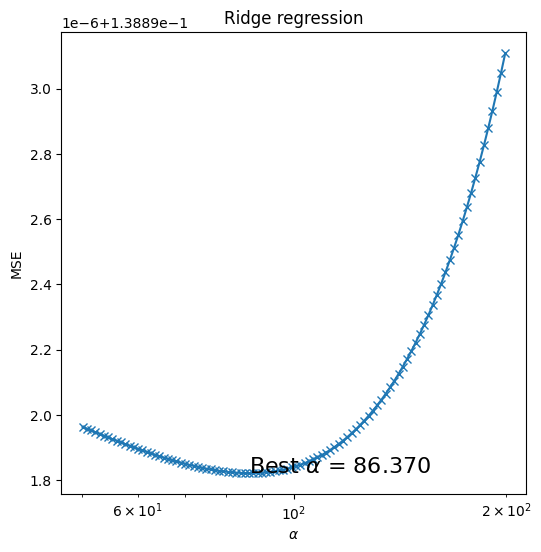

In [48]:
#Measures alpha, to be used ass activity_regularizer=l2(alpha)

from sklearn import linear_model
from sklearn.model_selection import cross_validate, KFold
import matplotlib.pyplot as plt

features = [c for c in X_train_transform.columns]
cv_results = []
coeffs = []
alphas = np.logspace(1.7, 2.3, 100)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas: #set up an array for alpha
    ridge = linear_model.Ridge(alpha=alpha, max_iter=10000) #iterate through alpha values
    ridge.fit(X_train_transform, y_train_defc)#fit the norm_train_X and our target data column (form_y)
    scores = cross_validate(ridge, X_train_transform, y_train_defc, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(ridge.coef_))

cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features[0:4])
f, ax = plt.subplots(figsize=(6, 6))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
#plt.xlim(0,10000)
plt.xscale(r"log")
#plt.xlim([0.1, 10])
#plt.xlim([0.01])
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Ridge regression")
rbest_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % rbest_alpha,
    (rbest_alpha, cv_results["score"].min()),
    fontsize=16,
);

In [ ]:
#Measures alpha, to be used ass activity_regularizer=l2(alpha)

from sklearn import linear_model
from sklearn.model_selection import cross_validate, KFold
import matplotlib.pyplot as plt

features = [c for c in X_train_transform.columns]
cv_results = []
coeffs = []
alphas = np.logspace(-4, -3, 100)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas: #set up an array for alpha
    lasso = linear_model.Lasso(alpha=alpha, max_iter=10000) #iterate through alpha values
    lasso.fit(X_train_transform, y_train_defc)#fit the norm_train_X and our target data column (form_y)
#    lasso.fit(X_train_transform, y_train_dten)#fit the norm_train_X and our target data column (form_y)
    scores = cross_validate(lasso, X_train_transform, y_train_defc, cv=kfold, scoring="neg_mean_squared_error")
#    scores = cross_validate(lasso, X_train_transform, y_train_dten, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))

cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features[0:4])
f, ax = plt.subplots(figsize=(6, 6))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
#plt.xlim(0,10000)
plt.xscale(r"log")
#plt.xlim([0.1, 10])
#plt.xlim([0.01])
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Lasso regression")
rbest_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.7f" % rbest_alpha,
    (rbest_alpha, cv_results["score"].min()),
    fontsize=16,
);

In [49]:
from keras.regularizers import l1
from keras.regularizers import l2

#Functionalizes neural network
#Will iterate through up to 3 layers
#Output layer must be 8 neurons
#to fit the size of defect_param

def get_reg(meta, hidden_layer_sizes, dropout, layer_activation):
    n_features_in_ = meta["n_features_in_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=layer_activation, activity_regularizer=l1(rbest_alpha)))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(4, activation='linear'))
    model.summary()
    return model

In [50]:
#Pull params from GridSearch and plug into variables
#below to create model

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__lr=0.001,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.05,
    model__activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
#For loops to generate list of tuples for neuron list
#Imperfect, gives repeats but not rearranged repeats
#eg will give (32, 64, 512) but not (64, 32, 512) 

from itertools import combinations_with_replacement

neurons_list=[]
neurons=list(range(32,544,32))
for layers in range(1, 4):
    neurons_per_layer=combinations_with_replacement(neurons,layers)
    temp=[i for i in neurons_per_layer]
    neurons_list.append(temp)
neurons_list=list(neurons_list)
print(neurons_list)

#stay below 1.0
lr_list = []
for exponent in range(-4, 0):
    lr_list.append(10**exponent)
print(lr_list)

#entries must be below 1
dropout_list = list(np.linspace(0,0.5,5, endpoint=False))
print(dropout_list)

#define layer_activation params:


#define output layer activation:


In [ ]:
#1 layer GridSearch gave (512,)
#For loop to make list of tuples
#(512, i)

_2dim_layers=[]
first_layer = 512
for i in neurons:
    temp_arch = (first_layer, i)
    _2dim_layers.append(temp_arch)
print(_2dim_layers)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
best_params_log=[]
params = {
    'optimizer__lr':lr_list,
    'model__hidden_layer_sizes':neurons_list[2],
                                # (100,100), (200,200), (300,300), (400,400),\
                                # (500,500), (600,600), (700,700), (800,800),
                                # (900,900), (1000,1000)],
    'model__dropout':dropout_list,
    'model__layer_activation': ['relu', 'sigmoid', 'linear']
}
gs = GridSearchCV(reg, params, refit=False, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

gs.fit(X_train_transform, y_train)
print(gs.best_score_, gs.best_params_)

best_params_log.append([gs.best_score_, gs.best_params_])

In [51]:
#Once the param_grid is created, can call function again
#or 

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.0001,
    model__hidden_layer_sizes=(128,64,32),
    model__dropout=0.4,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [52]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = reg.fit(X_train_transform, y_train_defc, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback]);
#history = model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1408      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 4)                

In [53]:
y_pred = reg.predict(X_test_transform)
y_pred = pd.DataFrame(10 ** y_pred, columns = targets_defc.columns)
display(y_pred)
y_pred.describe()

,def_conc1,def_conc2,def_conc3,def_conc4
0,0.264294,0.266613,0.266728,0.26728
1,0.264294,0.266613,0.266728,0.26728
2,0.264294,0.266613,0.266728,0.26728
3,0.264294,0.266613,0.266728,0.26728
4,0.264294,0.266613,0.266728,0.26728
...,...,...,...,...
5995,0.264294,0.266613,0.266728,0.26728
5996,0.264294,0.266613,0.266728,0.26728
5997,0.264294,0.266613,0.266728,0.26728
5998,0.264294,0.266613,0.266728,0.26728


,def_conc1,def_conc2,def_conc3,def_conc4
count,6000.000000,6000.000000,6000.000000,6000.00000
mean,0.264294,0.266613,0.266727,0.26728
std,0.000000,0.000000,0.000000,0.00000
min,0.264294,0.266613,0.266728,0.26728
25%,0.264294,0.266613,0.266728,0.26728
50%,0.264294,0.266613,0.266728,0.26728
75%,0.264294,0.266613,0.266728,0.26728
max,0.264294,0.266613,0.266728,0.26728


# Peak Fitted

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')
import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
folder_path = 'ground_truth_smoothed/'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df1 = pd.read_csv(file_path, header=None, names=['temperature', 'des_flux'], index_col=None)
            df1.squeeze("columns")
            data[filename] = df1
            
# Combine all the data into a single dataframe
df1 = pd.concat(data.values())

#display(df1)

des_flux = pd.read_csv('des_flux_15000.csv', index_col=0)
des_flux = des_flux.drop(['0'], axis=1)
des_flux.columns = np.arange(303, 1203, 3)
targets = pd.read_csv('def_param_v2.csv', index_col=0)
targets = targets[0:15000]
targets=np.log10(targets)
display(des_flux)
num_datapts = len(des_flux)
  # Combine all the data into a single dataframe

des_flux=des_flux.values.tolist()
#num_files=int(len(des_flux)/num_datapts) 
des_flux=np.reshape(des_flux, [15000, 300])
#display(targets)
#targets.describe()

In [ ]:
# Peak information
# Peak heights, position, and full width at half max
from scipy.signal import peak_widths, find_peaks
from sklearn.metrics import auc

peak_heights = []
fwhm = []
peak_positions = []
area_under_curves = []
stdev = []

for i in des_flux:
    peaks, _ = find_peaks(i)
    peak_pos = np.argmax(i)
    peak_height = np.max(i)
    peak_width, _, _, _ = peak_widths(i, [peak_pos], rel_height=0.5) 
        #taking only the first output (widths)
    peak_heights.append(peak_height)
    fwhm.append(peak_width[0])
    peak_positions.append(peak_pos)
# Area under curve
# Calculated using the trapezoidal method
    area_under_curve = auc(range(0,len(i)), i)
    area_under_curves.append(area_under_curve)
#STDEV
    spectra_std = np.std(i)
    stdev.append(spectra_std)

In [ ]:
# PCA Components based on normalized spectra

# Standardizing and applying PCA using a pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5))
])

scaled_des_flux = pca_pipe.fit_transform(des_flux)
result_pca = pca_pipe.fit_transform(scaled_des_flux)


# Formatting them into columns in a df
pca_col = ['PCA Component {}'.format(i+1) for i in range(result_pca.shape[1])]
pca_df = pd.DataFrame(data=result_pca, columns=pca_col)

display(pca_df)

In [ ]:
### Making the features matrix 
features_matrix = pd.DataFrame()
features_matrix['peak_heights'] = peak_heights 
features_matrix['peak_pos'] = peak_positions
features_matrix['fwhm'] = fwhm
features_matrix['auc'] = area_under_curves
features_matrix['std'] = stdev
features_matrix = pd.concat([features_matrix, pca_df],axis=1)
display(features_matrix)

In [ ]:
### Making the features matrix 
features_matrix = pd.DataFrame()
features_matrix['peak_heights'] = peak_heights 
features_matrix['peak_pos'] = peak_positions
features_matrix['fwhm'] = fwhm
features_matrix['auc'] = area_under_curves
features_matrix['std'] = stdev
features_matrix = pd.concat([features_matrix, pca_df],axis=1)
display(features_matrix)

In [ ]:
### Splitting and preparing the raw data

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


# Split the data into train and test sets
X_train, X_test= train_test_split(des_flux, test_size=0.1, random_state=42)
y_train_raw, y_test_raw = train_test_split(targets, test_size=0.1, random_state=42)

# Normalize the data using StandardScaler 
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_norm = scaler.fit_transform(np.array(X_train).reshape(-1, 300)) # Change lists into array
X_test_norm = scaler.transform(np.array(X_test).reshape(-1, 300))

X_train_transform_raw = np.reshape(X_train_norm, (X_train_norm.shape[0], -1))
X_test_transform_raw = np.reshape(X_test_norm, (X_test_norm.shape[0], -1))

print(X_train_transform_raw.shape)
print(X_test_transform_raw.shape)

In [ ]:
from sklearn.linear_model import RidgeCV

# Create the LassoCV model with a range of alpha values
alphas = np.logspace(-4, 2, 100)  # range of alpha values
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the LassoCV model on the training data
ridge_cv.fit(X_train_transform_raw, y_train_raw)

# Get the optimal alpha value
optimal_alpha = ridge_cv.alpha_

# Print the optimal alpha value
print("Optimal alpha:", optimal_alpha)

# Get the coefficients and corresponding feature names for the optimal alpha
ridge_coefs = ridge_cv.coef_
#feature_names = X_train.columns

# Select the features with non-zero coefficients for the optimal alpha
#selected_features = [feature for feature, coef in zip(feature_names, ridge_coefs) if coef != 0]

# Print the selected features
# print("Selected Features:")
# print(selected_features)

In [ ]:
from keras.regularizers import l2
import tensorflow as tf
from tensorflow import keras

#Functionalizes neural network
#Will iterate through up to 3 layers
#Output layer must be 8 neurons
#to fit the size of defect_param

def get_reg(meta, hidden_layer_sizes, dropout, layer_activation):
    n_features_in_ = meta["n_features_in_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=layer_activation, activity_regularizer=l2(optimal_alpha)))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(8, activation='sigmoid'))
    model.summary()
    return model

In [ ]:
#Pull params from GridSearch and plug into variables
#below to create model
from scikeras.wrappers import KerasRegressor


reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.001,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.05,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
#For loops to generate list of tuples for neuron list
#Imperfect, gives repeats but not rearranged repeats
#eg will give (32, 64, 512) but not (64, 32, 512) 

from itertools import combinations_with_replacement

neurons_list=[]
neurons=list(range(32,1028,64))
for layers in range(1, 4):
    neurons_per_layer=combinations_with_replacement(neurons,layers)
    temp=[i for i in neurons_per_layer]
    neurons_list.append(temp)
neurons_list=list(neurons_list)
print(neurons_list)

#stay below 1.0
learning_rate_list = []
for exponent in range(-7, -2):
    learning_rate_list.append(10**exponent)
print(learning_rate_list)

#entries must be below 1
dropout_list = list(np.linspace(0,0.5,5, endpoint=False))
print(dropout_list)

#define layer_activation params:


#define output layer activation:


In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rs_params_log = []
space = dict()
space['optimizer__learning_rate'] = learning_rate_list
space['model__hidden_layer_sizes'] = neurons_list[2]
space['model__dropout'] = dropout_list
space['model__layer_activation'] = ['relu']

search = RandomizedSearchCV(reg, space, n_iter=2250, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, random_state=42)

search.fit(X_train_transform_raw, y_train_raw)
print(search.best_score_, search.best_params_)

rs_params_log.append([search.best_score_, search.best_params_])

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
best_params_log=[]
params = {
    'optimizer__learning_rate':learning_rate_list,
    'model__hidden_layer_sizes':neurons_list[2],
                                # (100,100), (200,200), (300,300), (400,400),\
                                # (500,500), (600,600), (700,700), (800,800),
                                # (900,900), (1000,1000)],
    'model__dropout':dropout_list,
    'model__layer_activation': ['relu']
}
gs = GridSearchCV(reg, params, refit=False, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

gs.fit(X_train_transform_raw, y_train_raw)
print(gs.best_score_, gs.best_params_)

best_params_log.append([gs.best_score_, gs.best_params_])

In [ ]:
#Once the param_grid is created, can call function again
#or 

reg = KerasRegressor(
    model=get_reg,
    loss="mse",
    optimizer='adam',
    optimizer__learning_rate=0.0001,
    model__hidden_layer_sizes=(128,64,32),
    model__dropout=0.4,
    model__layer_activation='relu',
    metrics=[KerasRegressor.r_squared],
    verbose=False,
    random_state=42,
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = reg.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback]);
#history = model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

In [ ]:
y_pred = reg.predict(X_test_transform)
y_pred = pd.DataFrame(10 ** y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

In [ ]:
y_pred = reg.predict(gt_smooth)
y_pred = pd.DataFrame(y_pred, columns = targets.columns)
#y_pred = pd.DataFrame(y_pred, columns = targets.columns)
display(y_pred)
y_pred.describe()

In [ ]:
# -1.0427987322706567 {'optimizer__learning_rate': 0.001, 'model__layer_activation': 'relu', 'model__hidden_layer_sizes': (32, 32, 864), 'model__dropout': 0.1}
# CPU times: user 22.9 s, sys: 8.55 s, total: 31.4 s
# Wall time: 1h 51min 19s